# Final Project Submission

* **Student name**: Sara Robinson 
* **Student pace**: *self paced* / part time / full time
* **Scheduled project review date/time**: 9/9/2020 11:00 AM
* **Instructor name**: Jeff Herman
* **Blog post URL**:


## Introduction
The purpose of this project is to clean, organize, and analyze sets of data about movies in order to give recommendations to Microsoft to create original content for their new streaming platform.

The questions that will be answered throughout this project are:
1. Which movie studios make the most money?
2. What are the highest rated movie genres?
3. How does production budget effect a movie's earnings?

## Importing Libraries
In the following cells I imported the relevant libraries and checked to make sure I was in the right directory to access the given data.

In [2]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

In [4]:
cd zippedData #Moving into folder with movie data

/Users/robotrobz/Documents/Module1/Project/dsc-mod-1-project-v2-1-online-ds-sp-000/zippedData


In [6]:
ls #Listing out the items in this folder

bom.movie_gross.csv.gz        imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz       rt.movie_info.tsv.gz
imdb.title.akas.csv.gz        rt.reviews.tsv.gz
imdb.title.basics.csv.gz      tmdb.movies.csv.gz
imdb.title.crew.csv.gz        tn.movie_budgets.csv.gz
imdb.title.principals.csv.gz


## Reviewing and Light Cleaning
In the following cells I created a DataFrame for each set of data and reviewed the first two rows of data to ensure everything loaded correctly. In case there was data missing, I went ahead and checked how many null values there were and then removed said data if it was negligible (i.e. if more than 75% of data was missing).

### Box Office Mojo
In this dataset we see:
* title: the title of the movie
* studio: the studio that made the movie
* domestic_gross: how much money the movie made domestically
* foreign_gross: how much money the movie made in foreign countries
* year: the year the movie came out

In [7]:
bmg_df = pd.read_csv('bom.movie_gross.csv.gz')
bmg_df.head(2) #Creating a dataframe for this set of data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [8]:
bmg_df.shape #Checking how many entries there are

(3387, 5)

In [9]:
bmg_df.isnull().sum() #Checking to see the total missing values for each column

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

While there are some columns that are missing data, we won't remove any entries until we look further into this table later on.

### IMDB Name Basics
In this dataset we see:
* nconst: a code for each individual
* primary_name: the name of each individual
* birth_year: the year an individual was born
* death_year: the year an individual died if applicable
* primary_profession: the primary profession of the individual
* known_for_titles: the movies each individual is most associated with

In [10]:
inb_df = pd.read_csv('imdb.name.basics.csv.gz')
inb_df.head(2) #Creating a dataframe for this set of data

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


In [16]:
inb_df.shape #Checking how many entries there are

(606648, 4)

In [12]:
inb_df.isnull().sum() #Checking to see the total missing values for each column

nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

Both birth_year and death_year are missing well over 75% of their data, so I will remove these columns from the table. While primary_profession and known_for_titles are also missing data, they are not missing more than 75% so I will not remove those columns at this time.

In [13]:
del inb_df['birth_year']
del inb_df['death_year'] #Deleting the columns from the dataframe

In [14]:
inb_df.isnull().sum() #Checking to see if the columns were removed

nconst                    0
primary_name              0
primary_profession    51340
known_for_titles      30204
dtype: int64

In [15]:
inb_df.head(2) #Checking the head of the dataframe to double-check that the columns were removed

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


### IMDB Title AKAs
In this dataset we see:
* title_id: the code associated with each movie title
* ordering: a number that is associated with the title_id
* title: the title of the movie
* region: the region of release for the movie
* language: the language the movie is in
* types: how it is associated with IMDB
* attributes: attributes of the movie
* is_original_title: whether or not the title of the version is the original

In [17]:
ita_df = pd.read_csv('imdb.title.akas.csv.gz')
ita_df.head(2) #Creating a dataframe for this dataset

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0


In [18]:
ita_df.shape #Checking how many entries there are

(331703, 8)

In [19]:
ita_df.isnull().sum() #Checking to see the total missing values for each column

title_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

Both language and attributes are missing over 75% of their data, so we will remove those columns. While region, types, and is_original_title are missing some data, they are not missing over 75% so we will not remove that data for now.

In [20]:
del ita_df['language']
del ita_df['attributes'] #Deleting the columns from the dataframe

In [21]:
ita_df.isnull().sum() #Checking to see if the columns were removed

title_id                  0
ordering                  0
title                     0
region                53293
types                163256
is_original_title        25
dtype: int64

In [22]:
ita_df.head(2) #Checking the head of the dataframe to double-check that the columns were removed

,title_id,ordering,title,region,types,is_original_title
0,tt0369610,10,Джурасик свят,BG,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,imdbDisplay,0.0


### IMDB Title Basics
In this dataset we see:
* tconst: code associated with each movie
* primary_title: the used title of the movie
* original_title: the actual title of the movie
* start_year: year movie was released
* runtime_minutes: running time of the movie in minutes
* genres: genres of each movie

In [23]:
itb_df = pd.read_csv('imdb.title.basics.csv.gz')
itb_df.head(2) #Creating a dataframe for this set of data

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [24]:
itb_df.shape #Checking how many entries there are

(146144, 6)

In [25]:
itb_df.isnull().sum() #Checking to see the total missing values for each column

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

While original_title, runtime_minutes, and genres are missing some data, they are not missing more than 75% so we will leave them for now.

### IMDB Title Crew
In this dataset we see:
* tconst: code associated with each movie
* directors: the code associated with each name for the director
* writers: the code associated with each name for the writers

In [26]:
itc_df = pd.read_csv('imdb.title.crew.csv.gz')
itc_df.head(2) #Creating a dataframe for this set of data

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"


In [27]:
itc_df.shape #Checking how many entries there are

(146144, 3)

In [28]:
itc_df.isnull().sum() #Checking to see the total missing values for each column

tconst           0
directors     5727
writers      35883
dtype: int64

While both directors and wrtiers are missing some values, they are not missing more than 75% so we will not remove anything right now.

### IMDB Title Principals
In this dataset we see:
* tconst: code associated with each movie
* ordering: a number that is associated with the tconst
* nconst: code associated with the name of an individual
* category: the individual's position in the movie
* job: the job of each individual
* characters: characters associated with each individual

In [29]:
itp_df = pd.read_csv('imdb.title.principals.csv.gz')
itp_df.head(2) #Creating a dataframe for this set of data

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN


In [30]:
itp_df.shape #Checking how many entries there are

(1028186, 6)

In [31]:
itp_df.isnull().sum() #Checking to see the total missing values for each column

tconst             0
ordering           0
nconst             0
category           0
job           850502
characters    634826
dtype: int64

Job is missing over 75% of data so we will remove that column. While characters is not missing more than 75% of data, because it is missing over 600,000 we will also remove it since we are working with over 1 million entries overall.

In [32]:
del itp_df['job']
del itp_df['characters'] #Deleting the columns from the dataframe

In [33]:
itp_df.isnull().sum() #Checking to see if the columns were removed

tconst      0
ordering    0
nconst      0
category    0
dtype: int64

In [34]:
itp_df.head(2) #Checking the head of the dataframe to double-check that the columns were removed

,tconst,ordering,nconst,category
0,tt0111414,1,nm0246005,actor
1,tt0111414,2,nm0398271,director


### IMDB Title Ratings
In this dataset we see:
* tconst: code associated with movie
* averagerating: the average rating of the movie
* numvotes: the number of votes for each movie

In [35]:
itr_df = pd.read_csv('imdb.title.ratings.csv.gz')
itr_df.head(2) #Creating a dataframe for this set of data

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [36]:
itr_df.shape #Checking how many entries there are

(73856, 3)

In [37]:
itr_df.isnull().sum() #Checking to see the total missing values for each column

tconst           0
averagerating    0
numvotes         0
dtype: int64

Since there is no missing data we will not remove any columns.

### Rotten Tomatoes Movie Info
In this dataset we see:
* id: number associated with each movie
* synposis: summary of movie
* rating: movie rating
* genre: genre of movie
* director: director of movie
* writer: writer of movie
* theater_date: date movie was released in theatres
* dvd_date: date movie was released on dvd
* currency: currency associated with box_office
* box_office: how much money was made in theatres
* runtime: length of movie
* studio: studio that produced the movie

In [358]:
rtmi1_df = pd.read_csv('rt.movie_info.tsv.gz', delimiter = '\t')
rtmi1_df.head(2) #Creating a dataframe for this set of data

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [359]:
rtmi1_df.shape #Checking how many entries there are

(1560, 12)

In [360]:
rtmi1_df.isnull().sum() #Checking to see the total missing values for each column

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

Currency and box_office are missing more than 75% of data so we will remove those columns. Studio will also be removed because it is missing just a little less than 75% of data.

In [361]:
del rtmi1_df['currency']
del rtmi1_df['box_office']
del rtmi1_df['studio'] #Deleting the columns from the dataframe

In [362]:
rtmi1_df.isnull().sum() #Checking to see if the columns were removed

id                0
synopsis         62
rating            3
genre             8
director        199
writer          449
theater_date    359
dvd_date        359
runtime          30
dtype: int64

In [363]:
rtmi1_df.head(2) #Checking the had of the dataframe to double-check that the columns were removed

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes


### Rotten Tomatoes Reviews
In this dataset we see:
* id: number associated with each movie
* review: review of movie
* rating: rating of movie
* fresh: fresh rating of movie
* critic: critic that wrote the review
* top_critic: whether or not they're a top critic
* publisher: where the review was published
* date: date review was published

In [44]:
rtr_df = pd.read_csv('rt.reviews.tsv.gz', delimiter = '\t', encoding = 'unicode_escape')
rtr_df.head(2) #Creating a dataframe for this set of data

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


In [45]:
rtr_df.shape #Checking how many entries there are

(54432, 8)

In [46]:
rtr_df.isnull().sum() #Checking to see the total missing values for each column

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

While some columns are missing data, they are not missing more than 75% so we will keep them for now.

### TMDB Movies
In this dataset we see:
* Unnamed:0 : id associated with the movie
* genre_ids: id of genres associated with movie
* id: id of movie
* original_language: original language of movie
* original_title: original title of movie
* popularity: score of how popular movie was
* release_date: date movie was released
* title: title of movie
* vote_average: average vote for movie
* vote_count: number of votes for movie

In [47]:
tmdb_df = pd.read_csv('tmdb.movies.csv.gz')
tmdb_df.head(2) #Creating a dataframe for this set of data

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [48]:
tmdb_df.shape #Checking how many entries there are

(26517, 10)

In [49]:
tmdb_df.isnull().sum() #Checking to see the total missing values for each column

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

No data is missing so we do not need to remove any columns at this time.

### TN Movie Budgets
In this dataset we see:
* id: number associated with movie
* release_date: date movie was released
* movie: name of movie
* production_budget: how much the movie cost to make
* domestic_gross: how much money the movie made domestically
* worldwide_gross: how much money the movie made in foreign countries

In [50]:
tn_df = pd.read_csv('tn.movie_budgets.csv.gz')
tn_df.head(2) #Creating a dataframe for this set of data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [51]:
tn_df.shape #Checking how many entries there are

(5782, 6)

In [52]:
tn_df.isnull().sum() #Checking to see the total missing values from each column

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

Since there is no missing data we do not need to remove any columns at this time.

## 1. Which movie studios made the most money?
The first question I will be answering through analysis is which movie studios made the most money. By determining this I will be able to tell Microsoft which studios they should work with in order to maximize profit.

In order to figure this out, I followed the following steps:
1. Find the dataframe that provides both studio and money made for each movie and make sure it is formatted properly.
2. Find the number of movies made by each studio.
3. Find the total amount of money made by each studio.
4. Find the average amount of money made per movie by studio.

#### 1.1 Find dataframe that provides both studio and money made for each movie and make sure it is formatted properly.
Just by scrolling through the dataframes I created, I found that bmg_df included the aforementioned criteria. We only want to make recommendations based off of movies from the last decade, so we don't need to remove any from this list based on date because they all came out in 2010 or later. I reviewed the table and looked into the types of data each column provides.

In [53]:
bmg_df.head(2) #Reviewing the first two lines of the dataframe

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [57]:
bmg_df.info() #Finding out more about the types of data in this table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Foreign_gross is an object, but we know that it is a number so we need to change the dtype from object to float64.

In [60]:
bmg_df['foreign_gross'] = bmg_df['foreign_gross'].str.replace(',', '') #Removing commas from numbers

In [61]:
bmg_df = bmg_df.astype({'foreign_gross': float}) #Changing the column from object to float64

In [62]:
bmg_df.info() #Checking to see that the column dtype was changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


Now that the dtype is correct, let's remove all the rows that are missing entries. After let's double check that there are no missing values.

In [63]:
bmg_df = bmg_df.dropna()
bmg_df #Removing all the rows that are missing values

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


In [64]:
bmg_df.isnull().sum() #Checking to see that the missing values were removed

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

#### 1.2 Find the number of movies made by each studio.
Will start this by getting a count for each studio.

In [66]:
bmg_df['studio'].value_counts() #Getting a count of movies for each studio 

Uni.        144
Fox         134
WB          130
Sony        105
BV          104
           ... 
ENTMP         1
DR            1
PM&E          1
OMNI/FSR      1
ParC          1
Name: studio, Length: 172, dtype: int64

Let's turn this into a bar graph so we can better see these counts. We'll start by making a new dataframe of just the studios and counts of movies made.

In [82]:
studiocount_df = bmg_df.groupby(['studio']).size().reset_index(name = 'counts').sort_index()
studiocount_df #Creating a new dataframe with the studio and counts

,studio,counts
0,3D,1
1,A24,19
2,AF,2
3,AGF,1
4,AR,1
...,...,...
167,WOW,1
168,Wein.,69
169,Yash,6
170,Zee,1


The new dataframe is currently in alphabetical order, let's change it so we can look at it in order of most to least movies produced.

In [86]:
studiocount_df = studiocount_df.sort_values(by = ['counts'], ascending = False)
studiocount_df #Sorted the values from most to least by studio

,studio,counts
155,Uni.,144
57,Fox,134
163,WB,130
142,Sony,105
22,BV,104
...,...,...
97,MPFT,1
96,MOM,1
35,Da.,1
36,Darin Southa,1


Now we can use this new dataframe to create a bar graph to view our data.

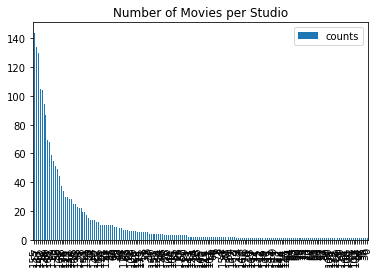

In [88]:
studiocount_df.plot(title = 'Number of Movies per Studio', kind = 'bar'); #Bar graph of movies per studio

There are too many studios on the x-axis, in addition to the graph not being formatted correctly. Let's fix this by only looking at the 10 studios that made the most movies. 

In [270]:
studiocount_df = studiocount_df.head(10)
studiocount_df #Turned the dataframe into the 25 movie studios that made the most movies

,studio,counts
155,Uni.,144
57,Fox,134
163,WB,130
142,Sony,105
22,BV,104
126,Par.,94
89,LGF,87
168,Wein.,69
71,IFC,68
137,SPC,59


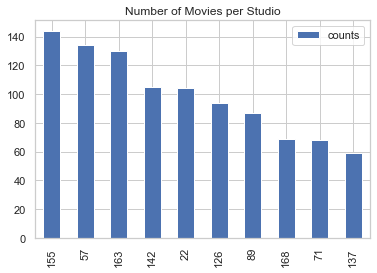

In [271]:
studiocount_df.plot(title = 'Number of Movies per Studio', kind = 'bar'); #Updated bar graph of movies per studio

This graph is much easier to look at, however there are no labels on the axes and the labels for the bars are not correct. We will be using seaborn to create a professional and final graph for the number of movies produced by each studio.

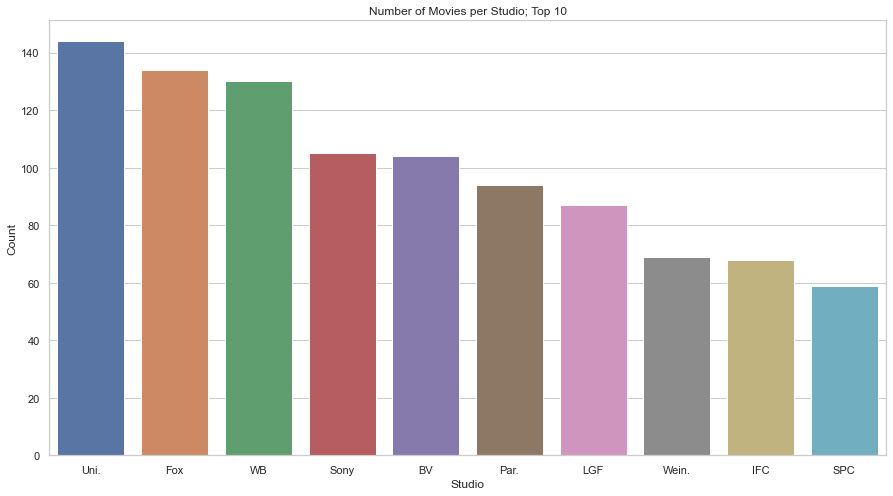

In [272]:
sns.set(style = 'whitegrid')
sns.set_context('notebook')
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'studio', y = 'counts', data = studiocount_df)
plt.xlabel('Studio')
plt.ylabel('Count')
plt.title('Number of Movies per Studio; Top 10'); #Making a better bar graph

It is now much easier to see the 10 studios that made the most movies. The top 5 studios are Uni., Fox, WB, Sony, and BV. As we go through the next part, let's see if these 5 are also the top grossing studios.

#### 1.3 Find the total amount of money made by each studio.
We will be looking at the studios that made the most domestically, foreign, and total. We will start this by pulling up the original dataframe.

In [98]:
bmg_df.head(2) #Reviewing the dataframe

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010


Now we want a total for how much money each studio made, then we will make three more bar graphs that show the 10 studios that made the most money domestically, foreign, and total, regardless of how many movies were made. We'll start by making another dataframe, but this time we will pull studios and their domestic_gross and foreign_gross sums.

In [104]:
bmg_df.groupby(['studio']).agg({'domestic_gross': 'sum', 'foreign_gross': 'sum'})
#Getting both domestic and foreign totals for each studio

,domestic_gross,foreign_gross
studio,,
3D,6.100000e+06,9.900000e+06
A24,2.604568e+08,2.384622e+08
AF,1.155000e+06,3.500000e+06
AGF,1.580000e+04,1.610000e+05
AR,3.500000e+05,5.770000e+07
...,...,...
WOW,3.080000e+04,1.860000e+04
Wein.,1.471817e+09,2.624086e+09
Yash,2.247380e+07,2.727607e+08


In [150]:
bmgtotal_df = bmg_df.groupby(['studio']).agg({'domestic_gross': 'sum', 'foreign_gross': 'sum'})
bmgtotal_df #Making a new dataframe with the domestic and foreign totals for each studio

,domestic_gross,foreign_gross
studio,,
3D,6.100000e+06,9.900000e+06
A24,2.604568e+08,2.384622e+08
AF,1.155000e+06,3.500000e+06
AGF,1.580000e+04,1.610000e+05
AR,3.500000e+05,5.770000e+07
...,...,...
WOW,3.080000e+04,1.860000e+04
Wein.,1.471817e+09,2.624086e+09
Yash,2.247380e+07,2.727607e+08


In [151]:
bmgtotal_df['total_gross'] = bmgtotal_df['domestic_gross'] + bmgtotal_df['foreign_gross']
bmgtotal_df #Adding a column for total gross

,domestic_gross,foreign_gross,total_gross
studio,,,
3D,6.100000e+06,9.900000e+06,1.600000e+07
A24,2.604568e+08,2.384622e+08,4.989190e+08
AF,1.155000e+06,3.500000e+06,4.655000e+06
AGF,1.580000e+04,1.610000e+05,1.768000e+05
AR,3.500000e+05,5.770000e+07,5.805000e+07
...,...,...,...
WOW,3.080000e+04,1.860000e+04,4.940000e+04
Wein.,1.471817e+09,2.624086e+09,4.095903e+09
Yash,2.247380e+07,2.727607e+08,2.952345e+08


##### Top 10 Domestic Gross Studios
First we'll look at the 10 studios that grossed the most domestically.

In [152]:
domgross_df = bmgtotal_df
domgross_df #Creating a new dataframe for domestic growth

,domestic_gross,foreign_gross,total_gross
studio,,,
3D,6.100000e+06,9.900000e+06,1.600000e+07
A24,2.604568e+08,2.384622e+08,4.989190e+08
AF,1.155000e+06,3.500000e+06,4.655000e+06
AGF,1.580000e+04,1.610000e+05,1.768000e+05
AR,3.500000e+05,5.770000e+07,5.805000e+07
...,...,...,...
WOW,3.080000e+04,1.860000e+04,4.940000e+04
Wein.,1.471817e+09,2.624086e+09,4.095903e+09
Yash,2.247380e+07,2.727607e+08,2.952345e+08


In [153]:
del domgross_df['foreign_gross']
del domgross_df['total_gross'] #Deleting columns we don't need

In [154]:
domgross_df.head(2) #Checking to make sure columns were deleted

,domestic_gross
studio,
3D,6100000.0
A24,260456800.0


In [155]:
domgross_df.sort_values(by = ['domestic_gross'], ascending = False) #Organizing from most to least money grossed 

,domestic_gross
studio,
BV,1.839653e+10
Uni.,1.289204e+10
WB,1.212360e+10
Fox,1.092450e+10
Sony,8.459479e+09
...,...
Grindstone,1.000000e+04
Libre,7.200000e+03
ParC,5.900000e+03


In [156]:
domgross_df = domgross_df.sort_values(by = ['domestic_gross'], ascending = False) #Changing the dataframe to organized

In [273]:
domgross_df = domgross_df.head(10)
domgross_df #Making it so that we only see the top 10

,domestic_gross
studio,
BV,1.839653e+10
Uni.,1.289204e+10
WB,1.212360e+10
Fox,1.092450e+10
Sony,8.459479e+09
Par.,7.580813e+09
LGF,3.991851e+09
WB (NL),3.975100e+09
LG/S,1.965200e+09


In [275]:
domgrossscale_df = domgross_df.groupby('studio').sum() / 1000000
domgrossscale_df #Making the numbers smaller so they will be easier to look at on a graph

,domestic_gross
studio,
BV,18396.529199
Fox,10924.499997
LG/S,1965.199998
LGF,3991.851400
P/DW,1682.900000
Par.,7580.812699
Sony,8459.479098
Uni.,12892.038000
WB,12123.600000


In [276]:
domgrossscale_df = domgrossscale_df.sort_values(by = ['domestic_gross'], ascending = False)
domgrossscale_df #Putting it back in order from most to least

,domestic_gross
studio,
BV,18396.529199
Uni.,12892.038000
WB,12123.600000
Fox,10924.499997
Sony,8459.479098
Par.,7580.812699
LGF,3991.851400
WB (NL),3975.099999
LG/S,1965.199998


In [277]:
domgrossscale_df.reset_index(inplace=True)
domgrossscale_df #Resetting the index so we can use studio as a variable when graphing

,studio,domestic_gross
0,BV,18396.529199
1,Uni.,12892.038000
2,WB,12123.600000
3,Fox,10924.499997
4,Sony,8459.479098
5,Par.,7580.812699
6,LGF,3991.851400
7,WB (NL),3975.099999
8,LG/S,1965.199998
9,P/DW,1682.900000


Now that we've organized and scaled down the 10 studios that made the most domestically, we can turn it into a bar graph.

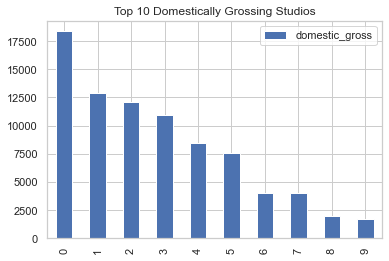

In [278]:
domgrossscale_df.plot(title = 'Top 10 Domestically Grossing Studios', kind = 'bar'); #Making the bar graph

While this bar graph is easy to look at, it is still missing labels on the axes and a title. We will use seaborn to fix this chart up.

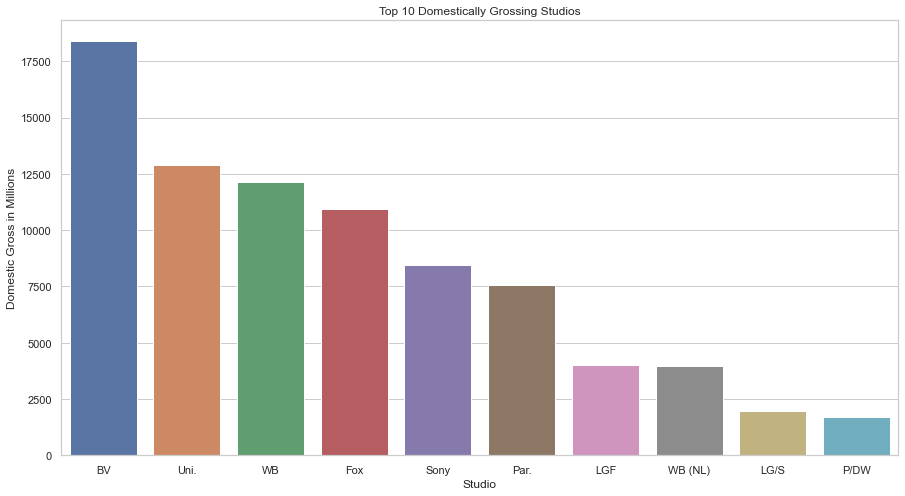

In [279]:
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'studio', y = 'domestic_gross', data = domgrossscale_df)
plt.xlabel('Studio')
plt.ylabel('Domestic Gross in Millions')
plt.title('Top 10 Domestically Grossing Studios'); #Making a better bar graph

Now this looks a lot better! The top 5 studios are BV, Uni, WB, Fox, and Sony; while they are in a different order, these are the also the 5 studios that made the most movies. Next we'll look at the top 10 studios that grossed interntionally.

##### Top 10 Foreign Gross Studios

In [168]:
forgross_df = bmg_df.groupby(['studio']).agg({'domestic_gross': 'sum', 'foreign_gross': 'sum'})
forgross_df #Making a new dataframe for foreign gross

,domestic_gross,foreign_gross
studio,,
3D,6.100000e+06,9.900000e+06
A24,2.604568e+08,2.384622e+08
AF,1.155000e+06,3.500000e+06
AGF,1.580000e+04,1.610000e+05
AR,3.500000e+05,5.770000e+07
...,...,...
WOW,3.080000e+04,1.860000e+04
Wein.,1.471817e+09,2.624086e+09
Yash,2.247380e+07,2.727607e+08


We only need to look at foreign gross so we will delete the domestic gross column, scale the foreign gross column down to smaller numbers, and organize from most to least.

In [169]:
del forgross_df['domestic_gross'] #Deleting the column we don't need

In [170]:
forgross_df.head(2) #Checking that the column was removed

,foreign_gross
studio,
3D,9900000.0
A24,238462200.0


In [172]:
forgrossscale_df = forgross_df.groupby('studio').sum() / 1000000
forgrossscale_df #Scaling it down

,foreign_gross
studio,
3D,9.900000
A24,238.462200
AF,3.500000
AGF,0.161000
AR,57.700000
...,...
WOW,0.018600
Wein.,2624.085999
Yash,272.760700


In [173]:
forgrossscale_df = forgrossscale_df.sort_values(by = ['foreign_gross'], ascending = False)
forgrossscale_df #Ordering from most to least

,foreign_gross
studio,
BV,25793.854700
Fox,20055.866599
WB,18667.902998
Uni.,16854.771191
Sony,13945.235998
...,...
Icar.,0.013700
ITL,0.011800
IVP,0.009100


In [174]:
forgrossscale_df.reset_index(inplace = True)
forgrossscale_df #Resetting the index so we can use studio as a variable when graphing

,studio,foreign_gross
0,BV,25793.854700
1,Fox,20055.866599
2,WB,18667.902998
3,Uni.,16854.771191
4,Sony,13945.235998
...,...,...
167,Icar.,0.013700
168,ITL,0.011800
169,IVP,0.009100
170,ICir,0.006400


In [280]:
forgrossscale_df = forgrossscale_df.head(10)
forgrossscale_df #Pulling the top 10

,studio,foreign_gross
0,BV,25793.854700
1,Fox,20055.866599
2,WB,18667.902998
3,Uni.,16854.771191
4,Sony,13945.235998
5,Par.,11863.384998
6,WB (NL),6339.000000
7,LGF,4475.619300
8,P/DW,3393.600000
9,LG/S,3353.724000


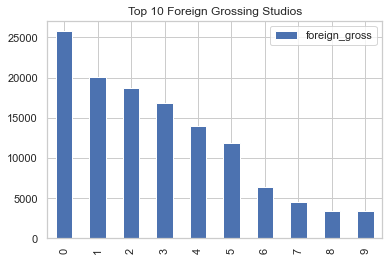

In [281]:
forgrossscale_df.plot(title = 'Top 10 Foreign Grossing Studios', kind = 'bar'); #Making the bar graph

While this bar graph is easy to look at, it is still missing labels on the axes and a title. We will use seaborn to fix this chart up.

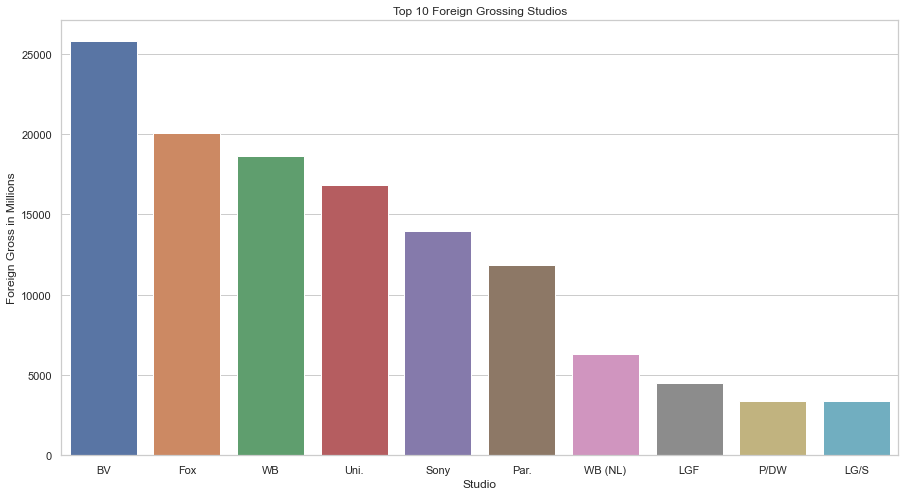

In [282]:
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'studio', y = 'foreign_gross', data = forgrossscale_df)
plt.xlabel('Studio')
plt.ylabel('Foreign Gross in Millions')
plt.title('Top 10 Foreign Grossing Studios'); #Making a better bar graph

Much better! The top 5 studios are BV, Fox, WB, Uni., and Sony; again these are the top 5 studios that made the most movies. Next we'll move on to view the studios that made the most money overall.

##### Top 10 Total Gross Studios

In [180]:
totalgross_df = bmg_df.groupby(['studio']).agg({'domestic_gross': 'sum', 'foreign_gross': 'sum'})
totalgross_df #Making a new dataframe for total gross

,domestic_gross,foreign_gross
studio,,
3D,6.100000e+06,9.900000e+06
A24,2.604568e+08,2.384622e+08
AF,1.155000e+06,3.500000e+06
AGF,1.580000e+04,1.610000e+05
AR,3.500000e+05,5.770000e+07
...,...,...
WOW,3.080000e+04,1.860000e+04
Wein.,1.471817e+09,2.624086e+09
Yash,2.247380e+07,2.727607e+08


In [181]:
totalgross_df['total_gross'] = totalgross_df['domestic_gross'] + totalgross_df['foreign_gross']
totalgross_df #Making a new column for the total gross of each studio

,domestic_gross,foreign_gross,total_gross
studio,,,
3D,6.100000e+06,9.900000e+06,1.600000e+07
A24,2.604568e+08,2.384622e+08,4.989190e+08
AF,1.155000e+06,3.500000e+06,4.655000e+06
AGF,1.580000e+04,1.610000e+05,1.768000e+05
AR,3.500000e+05,5.770000e+07,5.805000e+07
...,...,...,...
WOW,3.080000e+04,1.860000e+04,4.940000e+04
Wein.,1.471817e+09,2.624086e+09,4.095903e+09
Yash,2.247380e+07,2.727607e+08,2.952345e+08


Next we'll do the same as above; delete the columns we won't be using, scale it down, sort it by most to least, and cut it so we only have the top 25.

In [182]:
del totalgross_df['domestic_gross']
del totalgross_df['foreign_gross'] #Deleting the columns we don't need

In [183]:
totalgross_df.head(2) #Checking to make sure the columns were deleted

,total_gross
studio,
3D,16000000.0
A24,498919000.0


In [184]:
totalgrossscale_df = totalgross_df.groupby('studio').sum() / 1000000
totalgrossscale_df #Making the numbers smaller so they will be easier to look at on a graph

,total_gross
studio,
3D,16.000000
A24,498.919000
AF,4.655000
AGF,0.176800
AR,58.050000
...,...
WOW,0.049400
Wein.,4095.902697
Yash,295.234500


In [185]:
totalgrossscale_df = totalgrossscale_df.sort_values(by = ['total_gross'], ascending = False)
totalgrossscale_df #Putting it in order from most to least

,total_gross
studio,
BV,44190.383899
Fox,30980.366596
WB,30791.502998
Uni.,29746.809191
Sony,22404.715096
...,...
Darin Southa,0.098400
ICir,0.079600
ITL,0.052900


In [283]:
totalgrossscale_df = totalgrossscale_df.head(10)
totalgrossscale_df #Making it so that we only see the top 10

,studio,total_gross
0,BV,44190.383899
1,Fox,30980.366596
2,WB,30791.502998
3,Uni.,29746.809191
4,Sony,22404.715096
5,Par.,19444.197697
6,WB (NL),10314.099999
7,LGF,8467.470700
8,LG/S,5318.923998
9,P/DW,5076.500000


In [286]:
totalgrossscale_df.reset_index(inplace=False)
totalgrossscale_df #Resetting the index so we can use studio as a variable when graphing

,index,studio,total_gross
0,0,BV,44190.383899
1,1,Fox,30980.366596
2,2,WB,30791.502998
3,3,Uni.,29746.809191
4,4,Sony,22404.715096
5,5,Par.,19444.197697
6,6,WB (NL),10314.099999
7,7,LGF,8467.470700
8,8,LG/S,5318.923998
9,9,P/DW,5076.500000


In [287]:
del totalgrossscale_df['index']
totalgrossscale_df #Deleting the extra index column

,studio,total_gross
0,BV,44190.383899
1,Fox,30980.366596
2,WB,30791.502998
3,Uni.,29746.809191
4,Sony,22404.715096
5,Par.,19444.197697
6,WB (NL),10314.099999
7,LGF,8467.470700
8,LG/S,5318.923998
9,P/DW,5076.500000


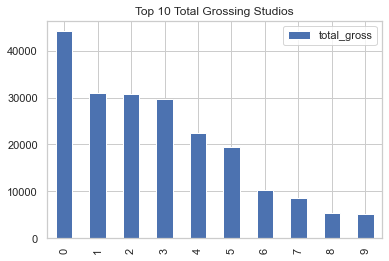

In [288]:
totalgrossscale_df.plot(title = 'Top 10 Total Grossing Studios', kind = 'bar'); #Making the bar graph

This graph is easy to view, but we need labels and titles for the axes. We will use seaborn to fix this graph up.

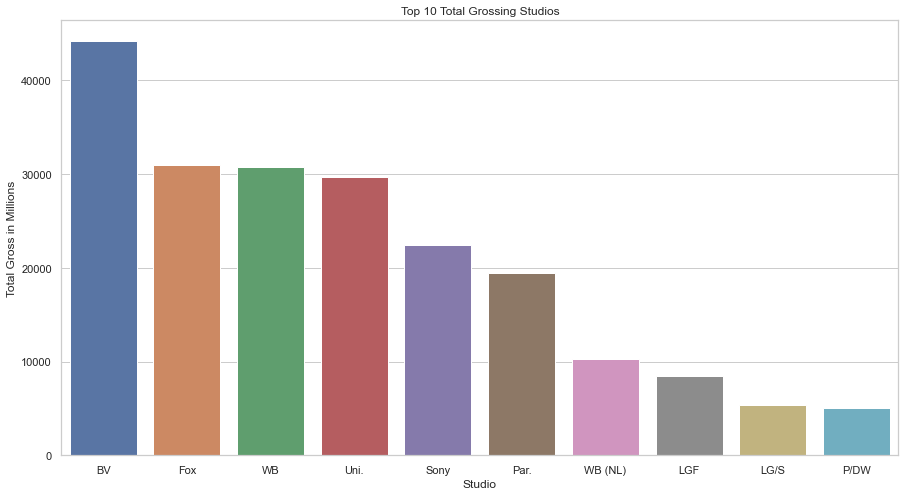

In [289]:
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'studio', y = 'total_gross', data = totalgrossscale_df)
plt.xlabel('Studio')
plt.ylabel('Total Gross in Millions')
plt.title('Top 10 Total Grossing Studios'); #Making a better bar graph

Much better! The top 5 studios here are BV, Fox, WB, Uni., and Sony. It looks like the top 5 studios have stayed the same throughout the different analyses, but the order of them has changed. Now we have a better idea of how much the studios made in domestic releases, foreign releases, and total. 

#### 1.4 Find the average amount of money made per movie by studio.
Now that we have determined which studios made the most money, we can look at what studios make on average per movie.

In [196]:
recount_df = bmg_df.groupby(['studio']).size().reset_index(name = 'counts').sort_index()
recount_df #Making a new dataframe for this set of data

,studio,counts
0,3D,1
1,A24,19
2,AF,2
3,AGF,1
4,AR,1
...,...,...
167,WOW,1
168,Wein.,69
169,Yash,6
170,Zee,1


In [210]:
del recount_df['studio'] #Deleting studio so we don't have two studio columns when we join

In [203]:
totalgross_df #Looking at the dataframe we want to join

,studio,total_gross
0,3D,1.600000e+07
1,A24,4.989190e+08
2,AF,4.655000e+06
3,AGF,1.768000e+05
4,AR,5.805000e+07
...,...,...
167,WOW,4.940000e+04
168,Wein.,4.095903e+09
169,Yash,2.952345e+08
170,Zee,1.671000e+06


In [211]:
grosspermovie_df = pd.concat([recount_df, totalgross_df], join = 'inner', axis = 1)
grosspermovie_df #Joining the dataframes

,counts,studio,total_gross
0,1,3D,1.600000e+07
1,19,A24,4.989190e+08
2,2,AF,4.655000e+06
3,1,AGF,1.768000e+05
4,1,AR,5.805000e+07
...,...,...,...
167,1,WOW,4.940000e+04
168,69,Wein.,4.095903e+09
169,6,Yash,2.952345e+08
170,1,Zee,1.671000e+06


In [212]:
grosspermovie_df['gross_per_movie'] = grosspermovie_df['total_gross'] / grosspermovie_df['counts']
grosspermovie_df #Adding a column that calculates the amount of money made per movie

,counts,studio,total_gross,gross_per_movie
0,1,3D,1.600000e+07,1.600000e+07
1,19,A24,4.989190e+08,2.625889e+07
2,2,AF,4.655000e+06,2.327500e+06
3,1,AGF,1.768000e+05,1.768000e+05
4,1,AR,5.805000e+07,5.805000e+07
...,...,...,...,...
167,1,WOW,4.940000e+04,4.940000e+04
168,69,Wein.,4.095903e+09,5.936091e+07
169,6,Yash,2.952345e+08,4.920575e+07
170,1,Zee,1.671000e+06,1.671000e+06


This is looking good so far. Next we will remove the columns we don't need for graphing, then we'll scale it down, organize it by top 25, and make a bar graph to show the results.

In [213]:
del grosspermovie_df['counts']
del grosspermovie_df['total_gross'] #Deleting columns we don't need

In [214]:
grosspermovie_df.head(2) #Checking to make sure the columns were deleted

,studio,gross_per_movie
0,3D,1.600000e+07
1,A24,2.625889e+07


In [215]:
grosspermoviescale_df = grosspermovie_df.groupby('studio').sum() / 1000000
grosspermoviescale_df #Making the numbers smaller so they will be easier to look at on a graph

,gross_per_movie
studio,
3D,16.000000
A24,26.258895
AF,2.327500
AGF,0.176800
AR,58.050000
...,...
WOW,0.049400
Wein.,59.360909
Yash,49.205750


In [216]:
grosspermoviescale_df = grosspermoviescale_df.sort_values(by = ['gross_per_movie'], ascending = False)
grosspermoviescale_df #Putting it in order from most to least

,gross_per_movie
studio,
HC,870.300000
P/DW,507.650000
BV,424.907537
GrtIndia,254.200000
WB,236.857715
...,...
Darin Southa,0.098400
ICir,0.079600
ITL,0.052900


In [290]:
grosspermoviescale_df = grosspermoviescale_df.head(10)
grosspermoviescale_df #Making it so that we only see the top 10

,studio,gross_per_movie
0,HC,870.300000
1,P/DW,507.650000
2,BV,424.907537
3,GrtIndia,254.200000
4,WB,236.857715
5,WB (NL),234.411364
6,Fox,231.196766
7,Sony,213.378239
8,Par.,206.853167
9,Uni.,206.575064


In [291]:
grosspermoviescale_df.reset_index(inplace=True)
grosspermoviescale_df #Resetting the index so we can use studio as a variable when graphing

,index,studio,gross_per_movie
0,0,HC,870.300000
1,1,P/DW,507.650000
2,2,BV,424.907537
3,3,GrtIndia,254.200000
4,4,WB,236.857715
5,5,WB (NL),234.411364
6,6,Fox,231.196766
7,7,Sony,213.378239
8,8,Par.,206.853167
9,9,Uni.,206.575064


In [292]:
del grosspermoviescale_df['index']
grosspermoviescale_df #Deleting the extra index column

,studio,gross_per_movie
0,HC,870.300000
1,P/DW,507.650000
2,BV,424.907537
3,GrtIndia,254.200000
4,WB,236.857715
5,WB (NL),234.411364
6,Fox,231.196766
7,Sony,213.378239
8,Par.,206.853167
9,Uni.,206.575064


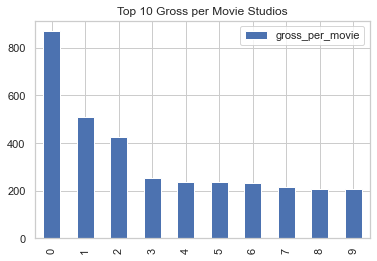

In [293]:
grosspermoviescale_df.plot(title = 'Top 10 Gross per Movie Studios', kind = 'bar'); #Making a bar graph

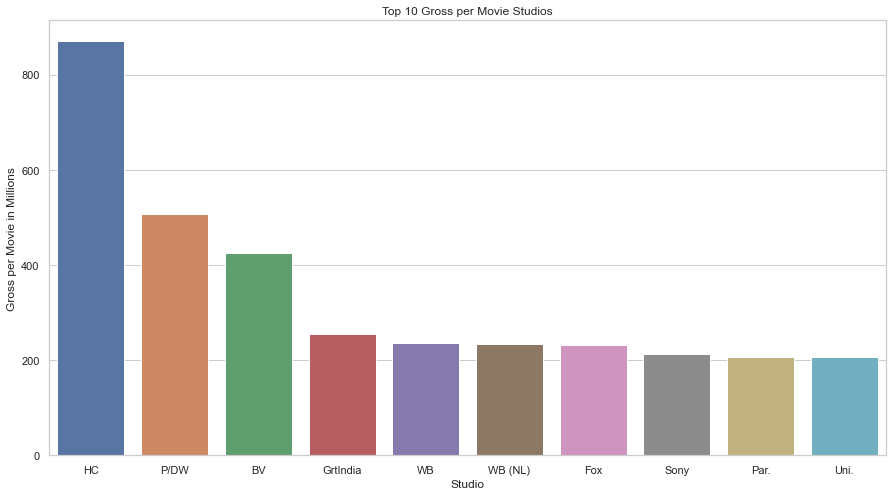

In [294]:
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'studio', y = 'gross_per_movie', data = grosspermoviescale_df)
plt.xlabel('Studio')
plt.ylabel('Gross per Movie in Millions')
plt.title('Top 10 Gross per Movie Studios'); #Making a better bar graph

Wow! What a difference. These 10 studios on average make the most per movie. Now we have many options to share with Microsoft for how they can choose to work with studios.

### Question 1 Summary:
* The studios that made the most movies were *Universal*, *Fox*, *Warner Brothers*, *Sony*, and *Buena Vista*.
* The studios that made the most money domestically were *Buena Vista*, *Universal*, *Warner Brothers*, *Fox*, and *Sony*.
* The studios that made the most money internationally were *Buena Vista*, *Fox*, *Warner Brothers*, *Universal*, and *Sony*.
* The studios that made the most money overall were *Buena Vista*, *Fox*, *Warner Brothers*, *Universal*, and *Sony*.
* The studios that made the most money per movie were *HC*, *DreamWorks Pictures*, *Buena Vista*, *GrtIndia*, and *Warner Brothers*.

## 2. What are the highest rated movie genres?
The second question I will be answering through analysis is which movie genres are rated the highest. By determining this I will be able to tell Microsoft what types of movies they should make in order to maximize viewers.

Just by scrolling through the dataframes I created, I found that rtmi_df has the genres of movies and rtr_df has the ratings/reviews, so those two will need to be combined. I also found that itr_df has ratings for movies and itb_df has the genres and names of the movies, so those two tables will need to be combined.

In order to figure this out, I followed the following steps for the IMDB and Rotten Tomatoes data:
1. Find the dataframes that provide genre and rating and make sure they are formatted properly.
2. Determine which genres have the highest average rating.
3. Determine which genres have the most votes regardless of rating.


#### 2.1.1 Find the dataframes that provide genre and rating and make sure they are formatted properly.

In [223]:
itb_df.head(2) #Reviewing the first two lines of the dataframe

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [224]:
itr_df.head(2) #Reviewing the first two lines of the dataframe

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


So we can easily join these two dataframes, let's organize both by tconst.

In [225]:
itbord_df = itb_df.sort_values(by = ['tconst'])
itbord_df #Making a new dataframe of organized values

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [226]:
itrord_df = itr_df.sort_values(by = ['tconst'])
itrord_df #Making a new dataframe of organized values

,tconst,averagerating,numvotes
36049,tt0063540,7.0,77
725,tt0066787,7.2,43
18429,tt0069049,6.9,4517
2223,tt0069204,6.1,13
1143,tt0100275,6.5,119
...,...,...,...
40537,tt9913084,6.2,6
62125,tt9914286,8.7,136
71368,tt9914642,8.5,8
52438,tt9914942,6.6,5


We have both tables organized now which is good, however the ratings table (itrord_df) has much less entries than the genre table (itbord_df). We need to make tconst the key for both dataframes and do an inner join so our final dataframe has only the movies that are on both lists. From there we can remove null values.

In [228]:
itbord_df.reset_index(drop=True, inplace = True)
itbord_df #Resetting the index

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [229]:
itrord_df.reset_index(drop=True, inplace=True)
itrord_df #Resetting the index

,tconst,averagerating,numvotes
0,tt0063540,7.0,77
1,tt0066787,7.2,43
2,tt0069049,6.9,4517
3,tt0069204,6.1,13
4,tt0100275,6.5,119
...,...,...,...
73851,tt9913084,6.2,6
73852,tt9914286,8.7,136
73853,tt9914642,8.5,8
73854,tt9914942,6.6,5


In [239]:
poppagen_df = pd.merge(itrord_df,
                      itbord_df[['tconst', 'primary_title', 'original_title', 'start_year', 'runtime_minutes',
                                 'genres']], on = 'tconst')
poppagen_df #Merging the dataframes to see which movie titles had which ratings

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,7.0,77,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,7.2,43,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,6.9,4517,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,6.1,13,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,6.5,119,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...,...
73851,tt9913084,6.2,6,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary
73852,tt9914286,8.7,136,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family"
73853,tt9914642,8.5,8,Albatross,Albatross,2017,NaN,Documentary
73854,tt9914942,6.6,5,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN


In [240]:
poppagen_df.isnull().sum() #Checking for missing values

tconst                0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

Since we're trying to figure out which genres are the most popular, let's remove all the entries that don't include genre.

In [241]:
poppagen_df.dropna(subset = ['genres'], inplace = True) #Removing rows with no genre from dataframe

In [242]:
poppagen_df.isnull().sum() #Checking to make sure the null rows were removed

tconst                0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7332
genres                0
dtype: int64

In [246]:
poppagen_df['genres'].value_counts() #Taking a look at the different types of genres

Drama                         11612
Documentary                   10313
Comedy                         5613
Horror                         2692
Comedy,Drama                   2617
                              ...  
Adventure,Romance,Thriller        1
Biography,Drama,Western           1
Fantasy,History,Mystery           1
Biography,History,Music           1
Drama,Fantasy,War                 1
Name: genres, Length: 923, dtype: int64

#### 2.2.1 Determine which genres have the highest average rating.

Next we will create a new dataframe that is organized by genre and average rating. Then we will sort it by top 10 and create visualizations.

In [269]:
pg1_df = poppagen_df.groupby(['genres', 'averagerating']).sum().reset_index().groupby('genres').mean()
pg1_df #New dataframe with the average rating of each genre and number of votes

,averagerating,numvotes,start_year,runtime_minutes
genres,,,,
Action,5.500000,4165.278481,24961.670886,941.873418
"Action,Adult,Comedy",4.650000,18.000000,2014.000000,35.500000
"Action,Adventure",5.220930,2535.139535,3185.255814,151.906977
"Action,Adventure,Animation",6.027273,81148.704545,7646.613636,333.886364
"Action,Adventure,Biography",6.988235,58805.941176,2489.176471,111.705882
...,...,...,...,...
Thriller,5.233784,5953.567568,42335.972973,1651.432432
"Thriller,War",5.650000,1791.500000,2013.250000,88.750000
"Thriller,Western",7.150000,3322.000000,2013.250000,47.500000


In [295]:
pgiar_df = pg1_df.sort_values(by = ['averagerating'], ascending = False)
pgiar_df #Making a new dataframe that is sorted by the average rating

,averagerating,numvotes,start_year,runtime_minutes
genres,,,,
"Comedy,Documentary,Fantasy",9.4,5.0,2015.0,70.0
"Documentary,Family,Musical",9.3,19.0,2017.0,59.0
"History,Sport",9.2,5.0,2016.0,0.0
"Music,Mystery",9.0,5.0,2012.0,0.0
Game-Show,9.0,7.0,2013.0,130.0
...,...,...,...,...
"Crime,Music",2.4,88.0,2018.0,94.0
"Adventure,Crime,Romance",2.3,9.0,2011.0,86.0
"History,Sci-Fi,Thriller",2.3,227.0,2017.0,120.0


In [296]:
del pgiar_df['start_year']
del pgiar_df['runtime_minutes'] #Deleting the columns we don't need to see

In [298]:
del pgiar_df['numvotes'] #Also deleting this column

In [299]:
pgiar_df = pgiar_df.head(10)
pgiar_df #Pulling the top 10 genres based on rating

,averagerating
genres,
"Comedy,Documentary,Fantasy",9.4
"Documentary,Family,Musical",9.3
"History,Sport",9.2
"Music,Mystery",9.0
Game-Show,9.0
"Documentary,News,Sport",8.8
"Documentary,News,Reality-TV",8.8
"Drama,Fantasy,War",8.8
"Drama,Short",8.8


In [302]:
pgiar_df.reset_index(inplace=True)
pgiar_df #Resetting the index so we can use genres as a variable when graphing

,genres,averagerating
0,"Comedy,Documentary,Fantasy",9.4
1,"Documentary,Family,Musical",9.3
2,"History,Sport",9.2
3,"Music,Mystery",9.0
4,Game-Show,9.0
5,"Documentary,News,Sport",8.8
6,"Documentary,News,Reality-TV",8.8
7,"Drama,Fantasy,War",8.8
8,"Drama,Short",8.8
9,"Comedy,Drama,Reality-TV",8.8


Now we have the Top 10 Genres based on IMDB average rating. Let's turn this into a graph so we can better see this.

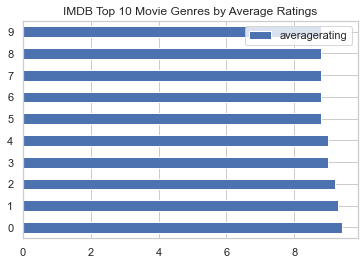

In [323]:
pgiar_df.plot(title = 'IMDB Top 10 Movie Genres by Average Ratings', kind = 'barh'); #Bar graph of top 10

Next let's remake it with seaborn so that it is easier to view and we can add labels.

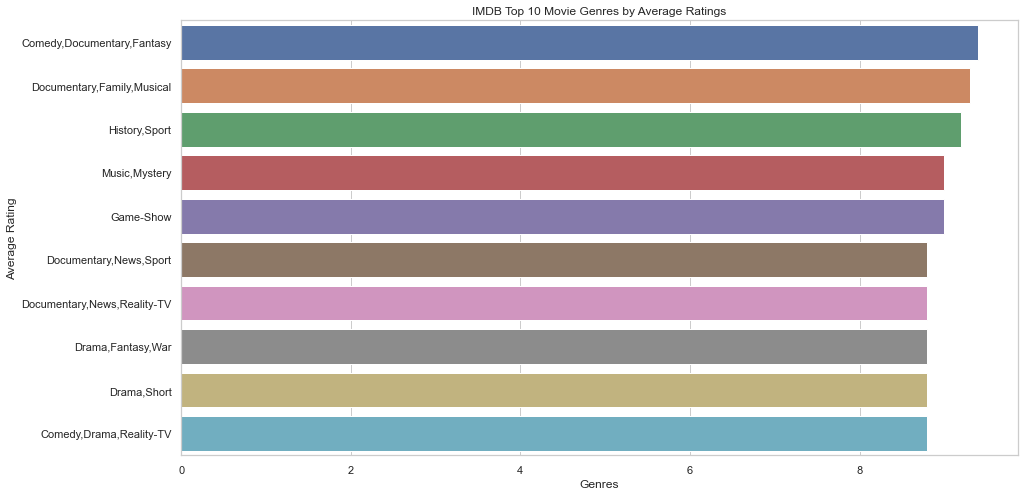

In [322]:
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'averagerating', y = 'genres', data = pgiar_df)
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('IMDB Top 10 Movie Genres by Average Ratings'); #Making a better bar graph

#### 2.3.1 Determine which genres have the most votes regardless of rating.

Now let's look at the top 10 movie genres based on number of votes.

In [307]:
pg2_df = poppagen_df.groupby(['genres', 'numvotes']).sum().reset_index().groupby('genres').sum()
pg2_df #New dataframe with total number of votes per genre

,numvotes,averagerating,start_year,runtime_minutes
genres,,,,
Action,304086,5636.8,1971972,74408.0
"Action,Adult,Comedy",36,9.3,4028,71.0
"Action,Adventure",108969,355.2,136966,6532.0
"Action,Adventure,Animation",3569160,1096.0,336451,14691.0
"Action,Adventure,Biography",999692,148.3,42316,1899.0
...,...,...,...,...
Thriller,371683,8870.1,3132862,122206.0
"Thriller,War",7166,22.6,8053,355.0
"Thriller,Western",13288,28.6,8053,190.0


In [308]:
pgitv_df = pg2_df.sort_values(by = ['numvotes'], ascending = False)
pgitv_df #Making a new dataframe and sorting by number of votes

,numvotes,averagerating,start_year,runtime_minutes
genres,,,,
"Action,Adventure,Sci-Fi",23022800,718.3,255849,13354.0
"Action,Adventure,Fantasy",9658850,553.3,207497,10832.0
"Adventure,Animation,Comedy",8686420,1412.9,479535,20697.0
"Comedy,Drama,Romance",7624891,7601.3,2432855,116382.0
Drama,7441076,75411.4,23389743,994790.0
...,...,...,...,...
"Action,Crime,Musical",5,4.4,2011,78.0
"Crime,Western",5,6.4,2010,105.0
"Action,Documentary,Horror",5,6.4,2015,74.0


In [309]:
del pgitv_df['averagerating']
del pgitv_df['start_year']
del pgitv_df['runtime_minutes'] #Deleting columns we don't need for graphing

In [310]:
pgitv_df = pgitv_df.head(10)
pgitv_df #Pulling the top 10 genres based on number of votes

,numvotes
genres,
"Action,Adventure,Sci-Fi",23022800
"Action,Adventure,Fantasy",9658850
"Adventure,Animation,Comedy",8686420
"Comedy,Drama,Romance",7624891
Drama,7441076
"Action,Adventure,Comedy",7255740
Comedy,6363080
"Comedy,Drama",6279751
"Action,Crime,Drama",5551000


In [311]:
pgitv_df.reset_index(inplace = True)
pgitv_df #Resetting the index so we can use genres as a variable when graphing

,genres,numvotes
0,"Action,Adventure,Sci-Fi",23022800
1,"Action,Adventure,Fantasy",9658850
2,"Adventure,Animation,Comedy",8686420
3,"Comedy,Drama,Romance",7624891
4,Drama,7441076
5,"Action,Adventure,Comedy",7255740
6,Comedy,6363080
7,"Comedy,Drama",6279751
8,"Action,Crime,Drama",5551000
9,"Drama,Romance",5479854


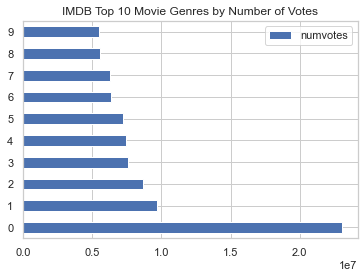

In [321]:
pgitv_df.plot(title = 'IMDB Top 10 Movie Genres by Number of Votes', kind = 'barh'); #Bar graph of top 10

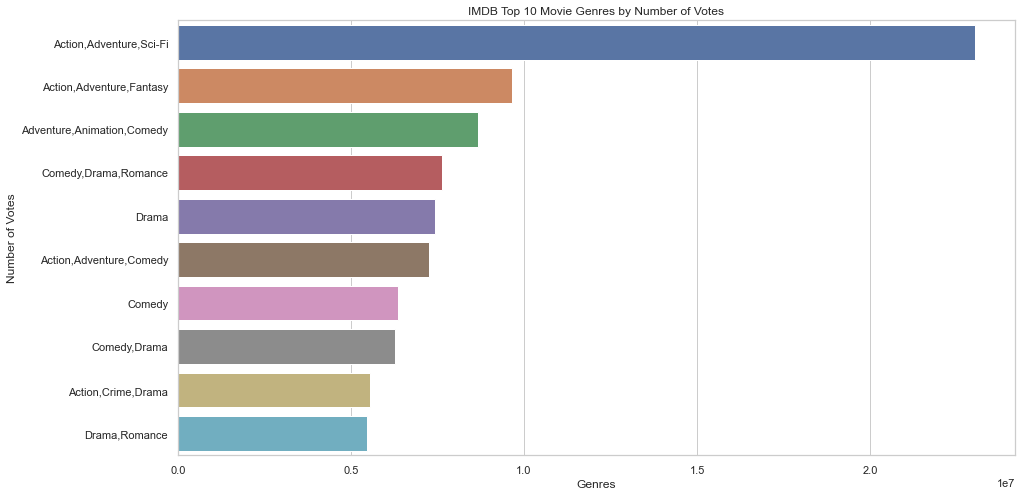

In [320]:
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'numvotes', y = 'genres', data = pgitv_df)
plt.xlabel('Genres')
plt.ylabel('Number of Votes')
plt.title('IMDB Top 10 Movie Genres by Number of Votes'); #Making a better bar graph

Although more votes doesn't mean better ratings, it is clear that specific genres attract more viewers than others. Let's take a look at the Rotten Tomatoes ratings now so that we have more data to inform Microsoft with.

#### 2.1.2 Find the dataframes that provide genre and rating and make sure they are formatted properly.

In [364]:
rtmi1_df.head(2) #Reviewing the first two lines of the dataframe

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes


In [331]:
rtr_df.head(2) #Reviewing the first two lines of the dataframe

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


We need to remove all the movies that were released in theatres prior to January 1, 2010, since we are only looking at movies of the last decade for this analysis. Next we'll need to remove columns that are not necessary and join the tables so we can see the rating for each movie and each movie's genre. Then we'll do the same as above and get the average rating for each genre.

In [366]:
rtmi1_df.isnull().sum() #Looking at missing values so we can remove

id                0
synopsis         62
rating            3
genre             8
director        199
writer          449
theater_date    359
dvd_date        359
runtime          30
dtype: int64

We want to remove all the entries that are missing theater_date and genre.

In [367]:
rtmi1_df.dropna(subset = ['theater_date'], inplace = True) #Removing rows with no theater date

In [368]:
rtmi1_df.isnull().sum() #Checking to see that those rows were removed

id                0
synopsis          3
rating            0
genre             0
director        118
writer          263
theater_date      0
dvd_date          0
runtime           7
dtype: int64

We don't have to remove genre anymore since some of the entries with no theater date were also the entries with no genre.

In [369]:
rtmi1_df.info() #Looking at the dtypes of each column, need to change theater_date so we can split it

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1201 non-null   int64 
 1   synopsis      1198 non-null   object
 2   rating        1201 non-null   object
 3   genre         1201 non-null   object
 4   director      1083 non-null   object
 5   writer        938 non-null    object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   runtime       1194 non-null   object
dtypes: int64(1), object(8)
memory usage: 93.8+ KB


In [370]:
rtmi1_df['theater_date'].sort_values(ascending = True) #Organizing dates, need to delete month and day

496     Apr 1, 1952
843     Apr 1, 1975
1531    Apr 1, 1976
22      Apr 1, 1981
402     Apr 1, 1982
           ...     
1434    Sep 8, 1996
1356    Sep 8, 2000
715     Sep 9, 1986
1374    Sep 9, 1988
716     Sep 9, 1992
Name: theater_date, Length: 1201, dtype: object

In [371]:
rtmi1_df['theater_date'] = rtmi1_df['theater_date'].astype('str') #Changing dtype to string

In [373]:
rtmi1_df['year'] = rtmi1_df['theater_date'].map(lambda x: x[-4:]) #Adding a new column for just the year
rtmi1_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,year
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,1971
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,2012
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes,1996
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes,1994
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",95 minutes,2000
...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",106 minutes,2006
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88 minutes,1993
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",111 minutes,1962
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",101 minutes,1993


In [374]:
rtmidate1_df = rtmi1_df.loc[rtmi1_df['year'] >= '2010']
rtmidate1_df #Making a new dataframe that only includes movies from 2010 and later

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,year
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,2012
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",117 minutes,2010
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",108 minutes,2010
16,23,A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,"Dec 20, 2013","Mar 18, 2014",129 minutes,2013
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",127 minutes,2013
...,...,...,...,...,...,...,...,...,...,...
1524,1960,SELMA is the story of a movement. The film chr...,PG-13,Drama,Ava DuVernay,Paul Webb,"Jan 9, 2015","May 5, 2015",127 minutes,2015
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,"Dec 23, 2011","Apr 3, 2012",126 minutes,2011
1536,1975,The year is 1953. A visiting archaeologist cal...,NR,Drama|Romance,Vikramaditya Motwane,Vikramaditya Motwane|Bhavani Iyer|Anurag Kashyap,"Jul 3, 2013","Jan 12, 2015",142 minutes,2013
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","Jun 21, 2016",123 minutes,2016


Now let's delete the columns we don't need from this new dataframe so that it will be ready to join.

In [375]:
del rtmidate1_df['rating']
del rtmidate1_df['director']
del rtmidate1_df['writer']
del rtmidate1_df['theater_date']
del rtmidate1_df['dvd_date']
del rtmidate1_df['runtime'] #Deleting columns we don't need, will keep synopsis for now

In [376]:
rtmidate1_df.head(2) #Checking to make sure columns were deleted

,id,synopsis,genre,year
1,3,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,2012
8,14,"""Love Ranch"" is a bittersweet love story that ...",Drama,2010


Next we want to look at the rotten tomatoes reviews dataframe and get an average for each individual movie. This dataframe has an entry for each individual review/rating, but we only want one average rating for each movie so we can easily join our dataframes.

In [377]:
rtr_df.head(2) #Looking at this dataframe

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


We're going to delete the columns we don't need, then compress the list into averages for each movie.

In [378]:
rtrave_df = rtr_df
rtrave_df #Making a new dataframe to work with

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [379]:
del rtrave_df['review']
del rtrave_df['critic']
del rtrave_df['top_critic']
del rtrave_df['publisher']
del rtrave_df['date'] #Deleting columns we don't need

In [381]:
rtrave_df.head(2) #Checking to make sure columns were deleted

,id,rating,fresh
0,3,3/5,fresh
1,3,NaN,rotten


In [382]:
rtrave_df.isnull().sum() #Checking to see null values

id            0
rating    13517
fresh         0
dtype: int64

In [383]:
rtrave_df.dropna(subset = ['rating'], inplace = True) #Removing rows with no rating from dataframe

In [384]:
rtrave_df.isnull().sum() #Checking to make sure the null rows were removed

id        0
rating    0
fresh     0
dtype: int64

In [392]:
rtrave_df['rating'].value_counts() #Taking a look at the different types of ratings

3/5       4327
4/5       3672
3/4       3577
2/5       3160
2/4       2712
          ... 
9.0          1
4.0/10       1
4.4/5        1
4.9          1
8.5          1
Name: rating, Length: 186, dtype: int64

Here we have an issue, the rating types are not the same so we can't easily take the average. It appears as though most of the ratings are fractions, so let's start by removing anything that is not a fraction. We'll want to convert the dtype from int64 to string so that we can remove anything that doesn't have '/' in it.

In [395]:
rtrave_df['rating'] = rtrave_df['rating'].astype('str') #Changing dtype to string

In [396]:
rtrave_df.info() #Checking to make sure the dtype was changed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40915 entries, 0 to 54431
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      40915 non-null  int64 
 1   rating  40915 non-null  object
 2   fresh   40915 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [398]:
rtrave_df = rtrave_df[rtrave_df.rating.str.contains('/')]
rtrave_df #Updating dataframe so it only includes ratings that have a '/' in it

,id,rating,fresh
0,3,3/5,fresh
7,3,2/5,rotten
12,3,2/4,rotten
14,3,3/4,fresh
15,3,3/5,fresh
...,...,...,...
54424,2000,1.5/5,rotten
54428,2000,1/5,rotten
54429,2000,2/5,rotten
54430,2000,2.5/5,rotten


Now let's transform the rating from a fraction to a number out of 10. In order to do this, we will define a function that converts the rating from a fraction to a whole number, then updates the dataframe.

In [404]:
def convert_to_float(frac_str):
    try:
        return float(frac_str)
    except ValueError:
        num, denom = frac_str.split('/')
        try:
            leading, num = num.split(' ')
            whole = float(leading)
        except ValueError:
            whole = 0
        frac = float(num) / float(denom)
        return whole - frac if whole < 0 else whole + frac #Function that changes fractions to float

In [406]:
rtrave_df['float_rating'] = rtrave_df['rating'].apply(convert_to_float)
rtrave_df #Adding a column for the float and applying the function

<ipython-input-406-fa2a3908a1f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rtrave_df['float_rating'] = rtrave_df['rating'].apply(convert_to_float)


,id,rating,fresh,float_rating
0,3,3/5,fresh,0.60
7,3,2/5,rotten,0.40
12,3,2/4,rotten,0.50
14,3,3/4,fresh,0.75
15,3,3/5,fresh,0.60
...,...,...,...,...
54424,2000,1.5/5,rotten,0.30
54428,2000,1/5,rotten,0.20
54429,2000,2/5,rotten,0.40
54430,2000,2.5/5,rotten,0.50


We want the final ratings to be out of 10 just like with the IMDB ratings, so we will multiple float_rating by 10, then we will average the rating for each movie and combine the dataframes.

In [407]:
rtrave_df['float_rating'] = rtrave_df['float_rating'] * 10
rtrave_df #Changing the float rating to a number out of 10

<ipython-input-407-19728081d023>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rtrave_df['float_rating'] = rtrave_df['float_rating'] * 10


,id,rating,fresh,float_rating
0,3,3/5,fresh,6.0
7,3,2/5,rotten,4.0
12,3,2/4,rotten,5.0
14,3,3/4,fresh,7.5
15,3,3/5,fresh,6.0
...,...,...,...,...
54424,2000,1.5/5,rotten,3.0
54428,2000,1/5,rotten,2.0
54429,2000,2/5,rotten,4.0
54430,2000,2.5/5,rotten,5.0


Let's remove the columns we don't need anymore and then grab an average rating for each movie.

In [408]:
del rtrave_df['rating']
del rtrave_df['fresh'] #Deleting the columns we don't need

In [409]:
rtrave_df.head(2) #Checking to make sure the columns were deleted

,id,float_rating
0,3,6.0
7,3,4.0


In [410]:
rave_df = rtrave_df.groupby(['id', 'float_rating']).sum().reset_index().groupby('id').mean()
rave_df #Making a new dataframe that has each movie's average rating

,float_rating
id,
3,5.883333
5,6.625000
6,5.386364
8,7.150000
10,5.208333
...,...
1996,5.285714
1997,4.375000
1998,6.000000


Now let's combine these dataframes!

In [411]:
rtgar_df = pd.merge(rave_df, 
                   rtmidate1_df[['id', 'genre', 'year']], on = 'id')
rtgar_df #Merging the dataframes to see which movies had which average rating

,id,float_rating,genre,year
0,3,5.883333,Drama|Science Fiction and Fantasy,2012
1,14,3.687500,Drama,2010
2,23,7.338235,Drama,2013
3,25,3.016667,Action and Adventure|Drama|Science Fiction and...,2013
4,54,6.681818,Comedy|Drama,2013
...,...,...,...,...
155,1960,7.628571,Drama,2015
156,1968,5.821429,Comedy|Drama,2011
157,1975,7.333333,Drama|Romance,2013
158,1976,7.500000,Action and Adventure|Art House and International,2016


#### 2.2.2 Determine which genres have the highest average rating.

Next we'll combine all the genres and get an average rating for each genre. Then we'll make some graphs to go along with this dataframe.

In [412]:
rtgar_df['genre'].value_counts() #Taking a look at the different types of genres

Drama                                                       36
Comedy|Drama                                                15
Comedy                                                      15
Drama|Mystery and Suspense                                   9
Comedy|Romance                                               8
                                                            ..
Documentary                                                  1
Action and Adventure|Animation|Comedy|Kids and Family        1
Drama|Kids and Family|Faith and Spirituality                 1
Mystery and Suspense|Science Fiction and Fantasy|Western     1
Drama|Musical and Performing Arts|Faith and Spirituality     1
Name: genre, Length: 62, dtype: int64

In [413]:
finrtgar_df = rtgar_df.groupby(['genre', 'float_rating']).sum().reset_index().groupby('genre').mean()
finrtgar_df #New dataframe with the average rating of each genre

,float_rating,id
genre,,
Action and Adventure,9.000000,1657.000000
Action and Adventure|Animation|Comedy|Kids and Family,5.250000,816.000000
Action and Adventure|Animation|Comedy|Science Fiction and Fantasy,5.312500,482.000000
Action and Adventure|Animation|Kids and Family,6.770833,1601.000000
Action and Adventure|Art House and International,7.500000,1976.000000
...,...,...
Horror|Mystery and Suspense,5.000000,136.000000
Horror|Mystery and Suspense|Science Fiction and Fantasy,3.755000,686.000000
Mystery and Suspense,6.224603,708.666667


In [414]:
del finrtgar_df['id'] #Deleting column we don't need

In [415]:
finrtgar_df.head(2) #Making sure the column was deleted

,float_rating
genre,
Action and Adventure,9.00
Action and Adventure|Animation|Comedy|Kids and Family,5.25


In [416]:
finrtgar_df = finrtgar_df.sort_values(by = ['float_rating'], ascending = False)
finrtgar_df #Ordering from highest to lowest rating

,float_rating
genre,
Action and Adventure,9.000000
Documentary|Musical and Performing Arts,7.637500
Action and Adventure|Art House and International,7.500000
Art House and International|Documentary,7.375000
Documentary,6.928571
...,...
Action and Adventure|Drama|Horror|Western,4.089286
Horror|Mystery and Suspense|Science Fiction and Fantasy,3.755000
Drama|Musical and Performing Arts|Special Interest,3.625000


In [417]:
finrtgar_df = finrtgar_df.head(10)
finrtgar_df #Pulling the top 10 genres based on rating

,float_rating
genre,
Action and Adventure,9.000000
Documentary|Musical and Performing Arts,7.637500
Action and Adventure|Art House and International,7.500000
Art House and International|Documentary,7.375000
Documentary,6.928571
Art House and International|Drama|Romance,6.840909
Drama|Romance,6.821354
Action and Adventure|Comedy|Science Fiction and Fantasy,6.819444
Mystery and Suspense|Science Fiction and Fantasy|Western,6.785714


In [418]:
finrtgar_df.reset_index(inplace = True)
finrtgar_df #Resetting the index so we can use genre as a variable when graphing

,genre,float_rating
0,Action and Adventure,9.000000
1,Documentary|Musical and Performing Arts,7.637500
2,Action and Adventure|Art House and International,7.500000
3,Art House and International|Documentary,7.375000
4,Documentary,6.928571
5,Art House and International|Drama|Romance,6.840909
6,Drama|Romance,6.821354
7,Action and Adventure|Comedy|Science Fiction an...,6.819444
8,Mystery and Suspense|Science Fiction and Fanta...,6.785714
9,Action and Adventure|Animation|Kids and Family,6.770833


Now we have the Top 10 genres based on Rotten Tomatoes average ratings. Let's turn this into a graph now.

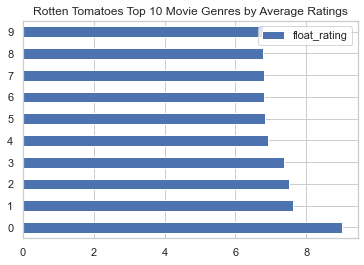

In [419]:
finrtgar_df.plot(title = 'Rotten Tomatoes Top 10 Movie Genres by Average Ratings', kind = 'barh'); #Bar graph of top10

Next we'll fix it up with seaborn and add labels.

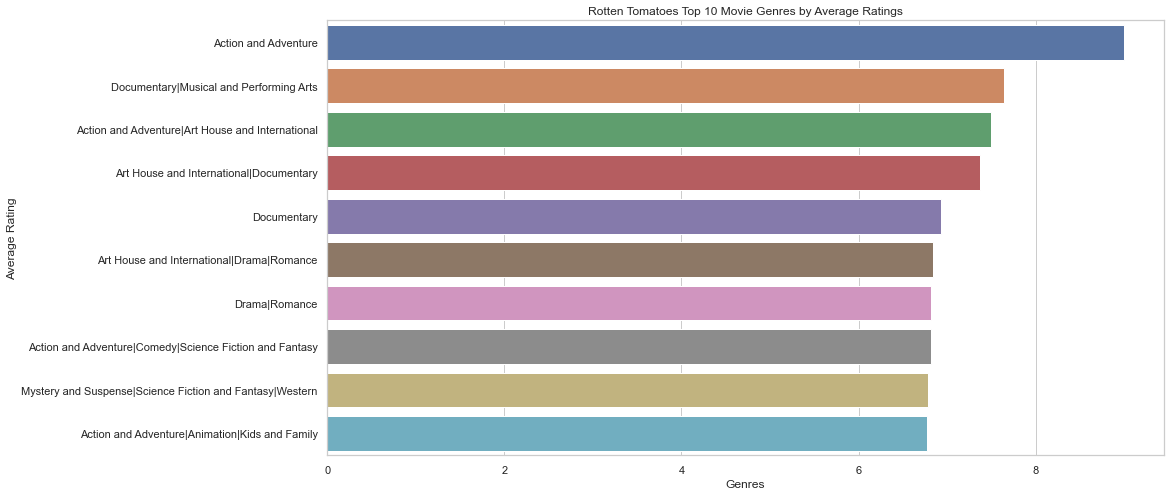

In [420]:
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'float_rating', y = 'genre', data = finrtgar_df)
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Rotten Tomatoes Top 10 Movie Genres by Average Ratings'); #Making a better bar graph

#### 2.3.2 Determine which genres have the most votes regardless of rating.

Let's also look at the number of ratings per genre, just like we looked at the number of votes with IMDB data.

In [424]:
rtrave_df['id'].value_counts() #Looking at number of reviews for each movie

782     180
1960    162
1525    156
1136    153
1083    150
       ... 
1897      1
1336      1
1763      1
164       1
1727      1
Name: id, Length: 1074, dtype: int64

In [425]:
countrtrave_df = rtrave_df.groupby(['id']).size().reset_index(name = 'counts').sort_index()
countrtrave_df #Creating a new dataframe with the movie and counts

,id,counts
0,3,93
1,5,19
2,6,39
3,8,35
4,10,52
...,...,...
1069,1996,92
1070,1997,18
1071,1998,2
1072,1999,28


In [426]:
rtcount_df = pd.merge(countrtrave_df, 
                     rtmidate1_df[['id', 'genre', 'year']], on = 'id')
rtcount_df #Merging the dataframes to see the number of reviews written for each movie

,id,counts,genre,year
0,3,93,Drama|Science Fiction and Fantasy,2012
1,14,18,Drama,2010
2,23,145,Drama,2013
3,25,21,Action and Adventure|Drama|Science Fiction and...,2013
4,54,50,Comedy|Drama,2013
...,...,...,...,...
155,1960,162,Drama,2015
156,1968,98,Comedy|Drama,2011
157,1975,3,Drama|Romance,2013
158,1976,61,Action and Adventure|Art House and International,2016


In [427]:
finrtcount_df = rtcount_df.groupby(['genre', 'counts']).sum().reset_index().groupby('genre').sum()
finrtcount_df #New dataframe with total number of reviews per genre

,counts,id
genre,,
Action and Adventure,1,1657
Action and Adventure|Animation|Comedy|Kids and Family,16,816
Action and Adventure|Animation|Comedy|Science Fiction and Fantasy,62,482
Action and Adventure|Animation|Kids and Family,115,1601
Action and Adventure|Art House and International,61,1976
...,...,...
Horror|Mystery and Suspense,45,136
Horror|Mystery and Suspense|Science Fiction and Fantasy,56,686
Mystery and Suspense,72,2126


In [428]:
del finrtcount_df['id'] #Deleting columns we don't need

In [429]:
finrtcount_df.head(2) #Checking to make sure column was deleted

,counts
genre,
Action and Adventure,1
Action and Adventure|Animation|Comedy|Kids and Family,16


In [430]:
finrtcount_df = finrtcount_df.sort_values(by = 'counts', ascending = False)
finrtcount_df #Sorting the dataframe by number of reviews

,counts
genre,
Drama,2123
Comedy|Drama,995
Comedy,925
Drama|Mystery and Suspense,647
Drama|Romance,410
...,...
Action and Adventure|Comedy,9
Documentary,9
Drama|Horror|Mystery and Suspense,8


In [431]:
finrtcount_df = finrtcount_df.head(10)
finrtcount_df #Pulling the top 10 genres based on number of reviews

,counts
genre,
Drama,2123
Comedy|Drama,995
Comedy,925
Drama|Mystery and Suspense,647
Drama|Romance,410
Comedy|Drama|Romance,328
Comedy|Romance,313
Horror,280
Action and Adventure|Science Fiction and Fantasy,262


In [432]:
finrtcount_df.reset_index(inplace = True)
finrtcount_df #Resetting the index so we can use genre as a variable when graphing

,genre,counts
0,Drama,2123
1,Comedy|Drama,995
2,Comedy,925
3,Drama|Mystery and Suspense,647
4,Drama|Romance,410
5,Comedy|Drama|Romance,328
6,Comedy|Romance,313
7,Horror,280
8,Action and Adventure|Science Fiction and Fantasy,262
9,Action and Adventure|Mystery and Suspense,262


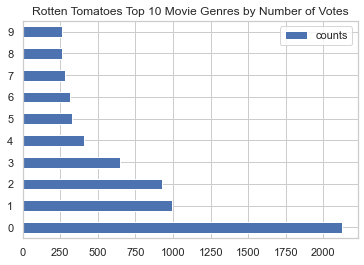

In [433]:
finrtcount_df.plot(title = 'Rotten Tomatoes Top 10 Movie Genres by Number of Votes', kind = 'barh'); #Bar graph of top 10

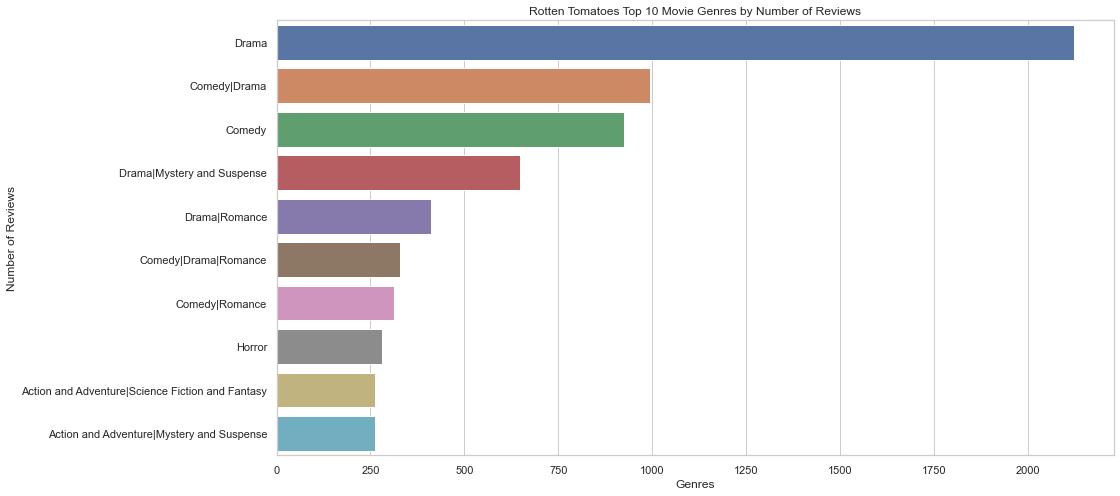

In [434]:
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'counts', y = 'genre', data = finrtcount_df)
plt.xlabel('Genres')
plt.ylabel('Number of Reviews')
plt.title('Rotten Tomatoes Top 10 Movie Genres by Number of Reviews'); #Making a better bar graph

Now that looks a little different than the top 10 genres based on average rating, and we have more options to compare.

### Question 2 Summary:
* According to IMDB data, the highest rated movie genres were *Comedy/Documentary/Fantasy*, *Documentary/Family/Musical*, *History/Sport*, *Music/Mystery*, and *Game-Show*.
* According to IMDB data, the most voted-on genres were *Action/Adventure/Sci-Fi*, *Action/Adventure/Fantasy*, *Adventure/Animation/Comedy*, *Comedy/Drama/Romance*, and *Drama*.
* According to Rotten Tomatoes data, the highest rated movie genres were *Action and Adventure*, *Documentary/Musical and Performing Arts*, *Action and Adventure/Art House and International*, *Art House and International/Documentary*, and *Documentary*.
* According to Rotten Tomatoes data, the most reviewed genres were *Drama*, *Comedy/Drama*, *Comedy*, *Drama/Mystery and Suspense*, and *Drama/Romance*.

## 3. How does production budget effect a movie's earnings?
The third question I will be answering through analysis is how a movie's budget is correlated with the amount of money the movie made. By determining this I will be able to tell Microsoft how much money they should spend on a movie to make the most money.

Just by scrolling through the initial dataframes I created, I found that tn_df holds information about production budget and how much each movie grossed.

In order to figure this out, I followed the following steps:
1. Find the dataframes that provide production budget and make sure it is formatted properly.
2. Find the movies had the highest production budget.
3. Find the movies that grossed the most.
4. Find the movies that grossed the most less their production budget.


#### 3.1 Find the dataframes that provide production budget and make sure it is formatted properly.


In [436]:
tn_df.head(2) #Reviewing the first two lines of the dataframe

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [442]:
tn_df.shape #Looking at how many entries there are

(5782, 6)

Before we start looking deeper into this table, let's get rid of all the movies that came out before 2010.

In [443]:
tn_df.isnull().sum() #Looking at missing values so we can remove

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [444]:
tn_df.info() #Looking at the dtypes of each column in case we need to change any

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Release date is an object, so we can easily split that into just year to remove anything that came before 2010. We will also need to change production_budget, domestic_gross, and worldwide_gross into floats so that we can run math on those numbers.

In [445]:
tn_df['release_date'] = tn_df['release_date'].astype('str') #Making sure dtype is a string so we can split it

In [446]:
tn_df['year'] = tn_df['release_date'].map(lambda x: x[-4:]) #Adding a new column for just the year
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015


In [447]:
tndate_df = tn_df.loc[tn_df['year'] >= '2010']
tndate_df #Making a new dataframe that only includes movies from 2010 and later

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015
...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,$0,2014
5771,72,"May 19, 2015",Family Motocross,"$10,000",$0,$0,2015
5772,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",2012
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018


Now let's the delete the columns we no longer need.

In [448]:
del tndate_df['id']
del tndate_df['release_date'] #Deleting columns we don't need

In [449]:
tndate_df.head(2) #Making sure the columns were deleted

,movie,production_budget,domestic_gross,worldwide_gross,year
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019


Now we need to change the dtype of production_budget, domestic_gross, and world_wide gross from object to float. First we need to remove the '$' and ',' from each entry, then we can convert them to floats.

In [453]:
tndate_df['production_budget'] = tndate_df['production_budget'].apply(lambda x: x.replace('$', '').replace(',', '')
                                                                     if isinstance(x, str) else x).astype(float)
tndate_df['domestic_gross'] = tndate_df['domestic_gross'].apply(lambda x: x.replace('$', '').replace(',', '')
                                                                     if isinstance(x, str) else x).astype(float)
tndate_df['worldwide_gross'] = tndate_df['worldwide_gross'].apply(lambda x: x.replace('$', '').replace(',', '')
                                                                     if isinstance(x, str) else x).astype(float)
#Removing the $ and , from each entry and changing each to float

<ipython-input-453-8cbc1cf6d638>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tndate_df['production_budget'] = tndate_df['production_budget'].apply(lambda x: x.replace('$', '').replace(',', '')
<ipython-input-453-8cbc1cf6d638>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tndate_df['domestic_gross'] = tndate_df['domestic_gross'].apply(lambda x: x.replace('$', '').replace(',', '')
<ipython-input-453-8cbc1cf6d638>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [454]:
tndate_df.head(2) #Checking to make sure the columns were converted

,movie,production_budget,domestic_gross,worldwide_gross,year
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019


Our dataframe is now formatted properly.

#### 3.2 Find the movies had the highest production budget.
Next we will sort this dataframe and create visualizations to determine which movies had the highest production budget.

In [456]:
tnsort_df = tndate_df.sort_values(by = ['production_budget'], ascending = False)
tnsort_df #Making a new dataframe of movies by highest production budget

,movie,production_budget,domestic_gross,worldwide_gross,year
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017
5,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015
...,...,...,...,...,...
5761,Stories of Our Lives,15000.0,0.0,0.000000e+00,2014
5771,Family Motocross,10000.0,0.0,0.000000e+00,2015
5772,Newlyweds,9000.0,4584.0,4.584000e+03,2012
5777,Red 11,7000.0,0.0,0.000000e+00,2018


In [457]:
tnspb_df = tnsort_df.head(10) #Making a new dataframe of just the top 10 movies with the highest production budget
tnspb_df

,movie,production_budget,domestic_gross,worldwide_gross,year
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017
5,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015
6,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018
8,Justice League,300000000.0,229024295.0,6.559452e+08,2017
9,Spectre,300000000.0,200074175.0,8.796209e+08,2015
12,The Lone Ranger,275000000.0,89302115.0,2.600021e+08,2013
13,John Carter,275000000.0,73058679.0,2.827781e+08,2012


In [460]:
tnspb_df['production_budget'] = tnspb_df['production_budget'] / 1000000 #Scaling it down for the graph

<ipython-input-460-0433cc3ff174>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tnspb_df['production_budget'] = tnspb_df['production_budget'] / 1000000 #Scaling it down for the graph


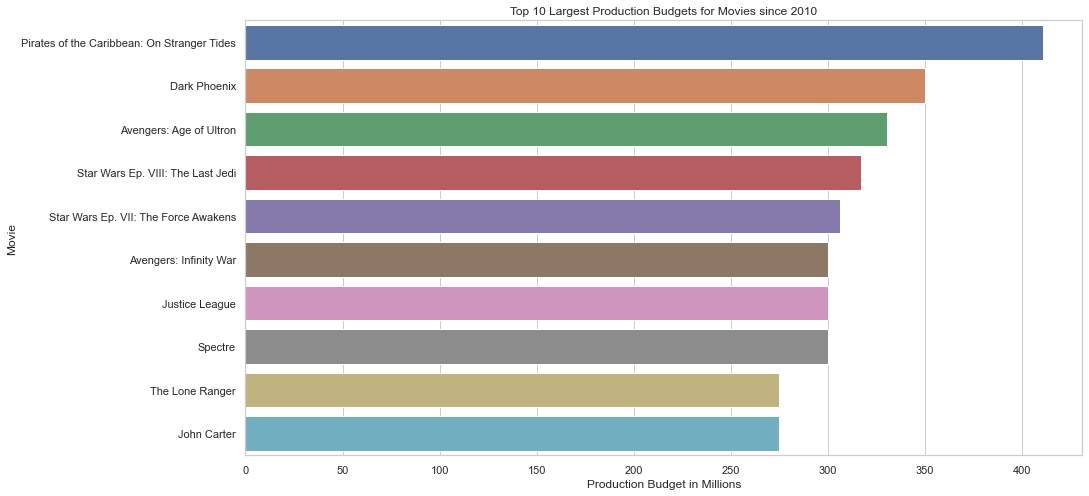

In [462]:
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'production_budget', y = 'movie', data = tnspb_df)
plt.xlabel('Production Budget in Millions')
plt.ylabel('Movie')
plt.title('Top 10 Largest Production Budgets for Movies since 2010'); #Making a bar graph of this information

Now that we can see the 10 largest movie production budgets, let's look at the 10 movies that grossed the most.

#### 3.3 Find the movies that grossed the most.
We'll start by adding another column for total gross, then we'll graph.

In [467]:
tndate_df.head() #Reviewing the dataframe

,movie,production_budget,domestic_gross,worldwide_gross,year
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017
5,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015


In [468]:
tndate_df['total_gross'] = tndate_df['domestic_gross'] + tndate_df['worldwide_gross']
tndate_df #Adding a new column for total gross of each movie

<ipython-input-468-63b541d36a42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tndate_df['total_gross'] = tndate_df['domestic_gross'] + tndate_df['worldwide_gross']


,movie,production_budget,domestic_gross,worldwide_gross,year,total_gross
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,1.286728e+09
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,1.925247e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,1.862020e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,1.936903e+09
5,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,2.989973e+09
...,...,...,...,...,...,...
5761,Stories of Our Lives,15000.0,0.0,0.000000e+00,2014,0.000000e+00
5771,Family Motocross,10000.0,0.0,0.000000e+00,2015,0.000000e+00
5772,Newlyweds,9000.0,4584.0,4.584000e+03,2012,9.168000e+03
5777,Red 11,7000.0,0.0,0.000000e+00,2018,0.000000e+00


In [469]:
tnstg_df = tndate_df.sort_values(by = ['total_gross'], ascending = False)
tnstg_df #Sorting list by total_gross

,movie,production_budget,domestic_gross,worldwide_gross,year,total_gross
5,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,2.989973e+09
6,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,2.726950e+09
33,Jurassic World,215000000.0,652270625.0,1.648855e+09,2015,2.301125e+09
26,The Avengers,225000000.0,623279547.0,1.517936e+09,2012,2.141215e+09
41,Black Panther,200000000.0,700059566.0,1.348258e+09,2018,2.048318e+09
...,...,...,...,...,...,...
5313,Hidden Away,1000000.0,0.0,0.000000e+00,2014,0.000000e+00
5312,Black Rock,1000000.0,0.0,0.000000e+00,2013,0.000000e+00
5311,Truth or Die,1000000.0,0.0,0.000000e+00,2012,0.000000e+00
5310,Snow White: A Deadly Summer,1000000.0,0.0,0.000000e+00,2012,0.000000e+00


In [470]:
tnstg_df['total_gross'] = tnstg_df['total_gross'] / 1000000
tnstg_df #Scaling total_gross down so it is easier to view when graphing

,movie,production_budget,domestic_gross,worldwide_gross,year,total_gross
5,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,2989.973445
6,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,2726.949682
33,Jurassic World,215000000.0,652270625.0,1.648855e+09,2015,2301.125489
26,The Avengers,225000000.0,623279547.0,1.517936e+09,2012,2141.215444
41,Black Panther,200000000.0,700059566.0,1.348258e+09,2018,2048.317790
...,...,...,...,...,...,...
5313,Hidden Away,1000000.0,0.0,0.000000e+00,2014,0.000000
5312,Black Rock,1000000.0,0.0,0.000000e+00,2013,0.000000
5311,Truth or Die,1000000.0,0.0,0.000000e+00,2012,0.000000
5310,Snow White: A Deadly Summer,1000000.0,0.0,0.000000e+00,2012,0.000000


In [471]:
tnstg_df = tnstg_df.head(10)
tnstg_df #Cutting the dataframe so it only has the top 10 total grossing movies

,movie,production_budget,domestic_gross,worldwide_gross,year,total_gross
5,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,2989.973445
6,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,2726.949682
33,Jurassic World,215000000.0,652270625.0,1.648855e+09,2015,2301.125489
26,The Avengers,225000000.0,623279547.0,1.517936e+09,2012,2141.215444
41,Black Panther,200000000.0,700059566.0,1.348258e+09,2018,2048.317790
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,1936.903129
66,Furious 7,190000000.0,353007020.0,1.518723e+09,2015,1871.729814
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,1862.019831
43,Incredibles 2,200000000.0,608581744.0,1.242521e+09,2018,1851.102455
134,Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,2017,1763.213871


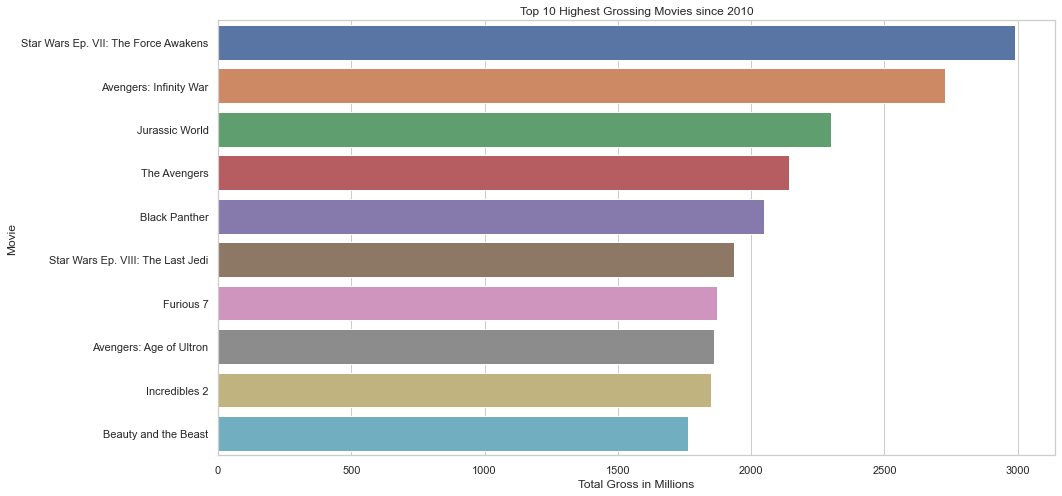

In [472]:
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'total_gross', y = 'movie', data = tnstg_df)
plt.xlabel('Total Gross in Millions')
plt.ylabel('Movie')
plt.title('Top 10 Highest Grossing Movies since 2010'); #Making a bar graph of this information

The movies with the highest budgets weren't necessarily the movies that made the most money based on the two graphs made so far. Let's now look at which movies made the most over their budget.

#### 3.4 Find the movies that grossed the most less their production budget.

In [473]:
tndate_df.head(2) #Reviewing the dataframe

,movie,production_budget,domestic_gross,worldwide_gross,year,total_gross
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,1.286728e+09
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,1.925247e+08


We're going to make a new column that shows the amount each movie made minus how much it cost to make. We are also going to make a new column that will show how much they made in terms of their production budget.

In [474]:
tndate_df['gross-budget'] = tndate_df['total_gross'] - tndate_df['production_budget']
tndate_df #Adding a new column and checking to make sure it's there

<ipython-input-474-6094c2c2f6f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tndate_df['gross-budget'] = tndate_df['total_gross'] - tndate_df['production_budget']


,movie,production_budget,domestic_gross,worldwide_gross,year,total_gross,gross-budget
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,1.286728e+09,8.761278e+08
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,1.925247e+08,-1.574753e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,1.862020e+09,1.531420e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,1.936903e+09,1.619903e+09
5,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,2.989973e+09,2.683973e+09
...,...,...,...,...,...,...,...
5761,Stories of Our Lives,15000.0,0.0,0.000000e+00,2014,0.000000e+00,-1.500000e+04
5771,Family Motocross,10000.0,0.0,0.000000e+00,2015,0.000000e+00,-1.000000e+04
5772,Newlyweds,9000.0,4584.0,4.584000e+03,2012,9.168000e+03,1.680000e+02
5777,Red 11,7000.0,0.0,0.000000e+00,2018,0.000000e+00,-7.000000e+03


In [475]:
tndate_df['pb_in_gross'] = tndate_df['gross-budget'] / tndate_df['production_budget']
tndate_df #Adding a new column and checking to make sure it's there

<ipython-input-475-2e5dc97e0193>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tndate_df['pb_in_gross'] = tndate_df['gross-budget'] / tndate_df['production_budget']


,movie,production_budget,domestic_gross,worldwide_gross,year,total_gross,gross-budget,pb_in_gross
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,1.286728e+09,8.761278e+08,2.133774
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,1.925247e+08,-1.574753e+08,-0.449929
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,1.862020e+09,1.531420e+09,4.632244
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,1.936903e+09,1.619903e+09,5.110105
5,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,2.989973e+09,2.683973e+09,8.771155
...,...,...,...,...,...,...,...,...
5761,Stories of Our Lives,15000.0,0.0,0.000000e+00,2014,0.000000e+00,-1.500000e+04,-1.000000
5771,Family Motocross,10000.0,0.0,0.000000e+00,2015,0.000000e+00,-1.000000e+04,-1.000000
5772,Newlyweds,9000.0,4584.0,4.584000e+03,2012,9.168000e+03,1.680000e+02,0.018667
5777,Red 11,7000.0,0.0,0.000000e+00,2018,0.000000e+00,-7.000000e+03,-1.000000


Next we're going to graph this data in two different ways. First we'll look at movies that made the most over their production budget, then we'll look at movies that made multiple times their production budget.

In [476]:
tngb_df = tndate_df.sort_values(by = ['gross-budget'], ascending = False)
tngb_df #Making a new dataframe sorted by total gross less budget

,movie,production_budget,domestic_gross,worldwide_gross,year,total_gross,gross-budget,pb_in_gross
5,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,2.989973e+09,2.683973e+09,8.771155
6,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,2.726950e+09,2.426950e+09,8.089832
33,Jurassic World,215000000.0,652270625.0,1.648855e+09,2015,2.301125e+09,2.086125e+09,9.702909
26,The Avengers,225000000.0,623279547.0,1.517936e+09,2012,2.141215e+09,1.916215e+09,8.516513
41,Black Panther,200000000.0,700059566.0,1.348258e+09,2018,2.048318e+09,1.848318e+09,9.241589
...,...,...,...,...,...,...,...,...
480,Army of the Dead,90000000.0,0.0,0.000000e+00,2019,0.000000e+00,-9.000000e+07,-1.000000
479,Bright,90000000.0,0.0,0.000000e+00,2017,0.000000e+00,-9.000000e+07,-1.000000
341,Men in Black: International,110000000.0,3100000.0,3.100000e+06,2019,6.200000e+06,-1.038000e+08,-0.943636
194,Moonfall,150000000.0,0.0,0.000000e+00,2020,0.000000e+00,-1.500000e+08,-1.000000


In [477]:
tngb_df = tngb_df.head(10) #Cutting the dataframe so it only shows the top 10
tngb_df

,movie,production_budget,domestic_gross,worldwide_gross,year,total_gross,gross-budget,pb_in_gross
5,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015,2.989973e+09,2.683973e+09,8.771155
6,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,2.726950e+09,2.426950e+09,8.089832
33,Jurassic World,215000000.0,652270625.0,1.648855e+09,2015,2.301125e+09,2.086125e+09,9.702909
26,The Avengers,225000000.0,623279547.0,1.517936e+09,2012,2.141215e+09,1.916215e+09,8.516513
41,Black Panther,200000000.0,700059566.0,1.348258e+09,2018,2.048318e+09,1.848318e+09,9.241589
66,Furious 7,190000000.0,353007020.0,1.518723e+09,2015,1.871730e+09,1.681730e+09,8.851210
43,Incredibles 2,200000000.0,608581744.0,1.242521e+09,2018,1.851102e+09,1.651102e+09,8.255512
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,1.936903e+09,1.619903e+09,5.110105
134,Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,2017,1.763214e+09,1.603214e+09,10.020087
260,Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,2011,1.722886e+09,1.597886e+09,12.783091


In [478]:
tngb_df['gross-budget'] = tngb_df['gross-budget'] / 1000000 #Sclaing it down for the graph

<ipython-input-478-ee3658bd77d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tngb_df['gross-budget'] = tngb_df['gross-budget'] / 1000000 #Sclaing it down for the graph


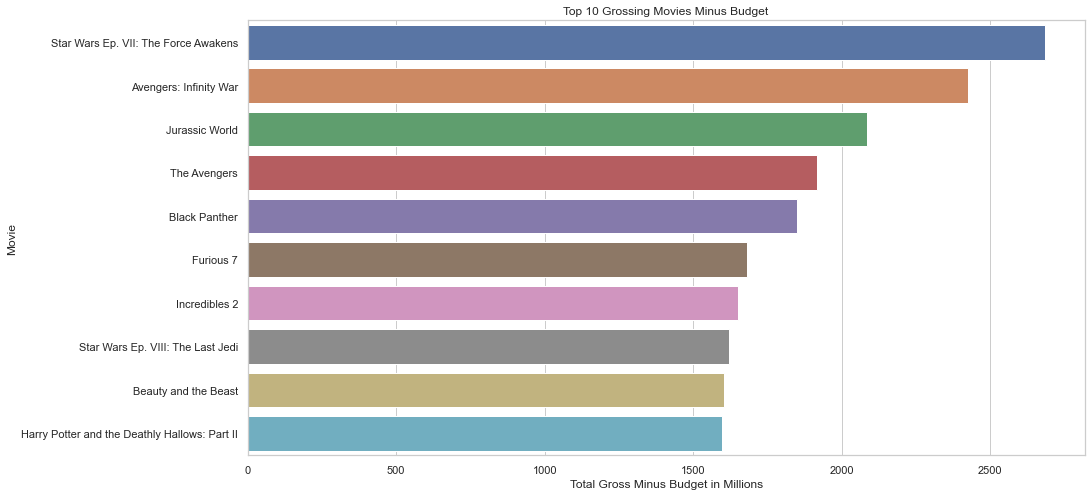

In [479]:
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'gross-budget', y = 'movie', data = tngb_df)
plt.xlabel('Total Gross Minus Budget in Millions')
plt.ylabel('Movie')
plt.title('Top 10 Grossing Movies Minus Budget'); #Making a bar graph of this information

In [480]:
tnpbig_df = tndate_df.sort_values(by = ['pb_in_gross'], ascending = False)
tnpbig_df #Making a new dataframe sorted by production budget in total gross

,movie,production_budget,domestic_gross,worldwide_gross,year,total_gross,gross-budget,pb_in_gross
5679,The Gallows,100000.0,22764410.0,41656474.0,2015,64420884.0,64320884.0,643.208840
5211,The Devil Inside,1000000.0,53262945.0,101759490.0,2012,155022435.0,154022435.0,154.022435
5189,Godâs Not Dead,1150000.0,60755732.0,63777092.0,2014,124532824.0,123382824.0,107.289412
5062,Insidious,1500000.0,54009150.0,99870886.0,2011,153880036.0,152380036.0,101.586691
5213,Unfriended,1000000.0,32789645.0,64364198.0,2015,97153843.0,96153843.0,96.153843
...,...,...,...,...,...,...,...,...
5032,Against the Wild,1800000.0,0.0,0.0,2014,0.0,-1800000.0,-1.000000
5031,Independence Daysaster,1800000.0,0.0,0.0,2013,0.0,-1800000.0,-1.000000
5030,Dysfunctional Friends,1800000.0,0.0,0.0,2012,0.0,-1800000.0,-1.000000
5002,The Marine 4,1950000.0,0.0,0.0,2015,0.0,-1950000.0,-1.000000


In [481]:
tnpbig_df = tnpbig_df.head(10) #Cutting the dataframe so it only shows the top 10
tnpbig_df

,movie,production_budget,domestic_gross,worldwide_gross,year,total_gross,gross-budget,pb_in_gross
5679,The Gallows,100000.0,22764410.0,41656474.0,2015,64420884.0,64320884.0,643.208840
5211,The Devil Inside,1000000.0,53262945.0,101759490.0,2012,155022435.0,154022435.0,154.022435
5189,Godâs Not Dead,1150000.0,60755732.0,63777092.0,2014,124532824.0,123382824.0,107.289412
5062,Insidious,1500000.0,54009150.0,99870886.0,2011,153880036.0,152380036.0,101.586691
5213,Unfriended,1000000.0,32789645.0,64364198.0,2015,97153843.0,96153843.0,96.153843
4664,Paranormal Activity 2,3000000.0,84752907.0,177512032.0,2010,262264939.0,259264939.0,86.421646
4248,Get Out,5000000.0,176040665.0,255367951.0,2017,431408616.0,426408616.0,85.281723
4249,Split,5000000.0,138141585.0,278964806.0,2017,417106391.0,412106391.0,82.421278
4250,Paranormal Activity 3,5000000.0,104028807.0,207039844.0,2011,311068651.0,306068651.0,61.213730
5063,Moonlight,1500000.0,27854931.0,65245512.0,2016,93100443.0,91600443.0,61.066962


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


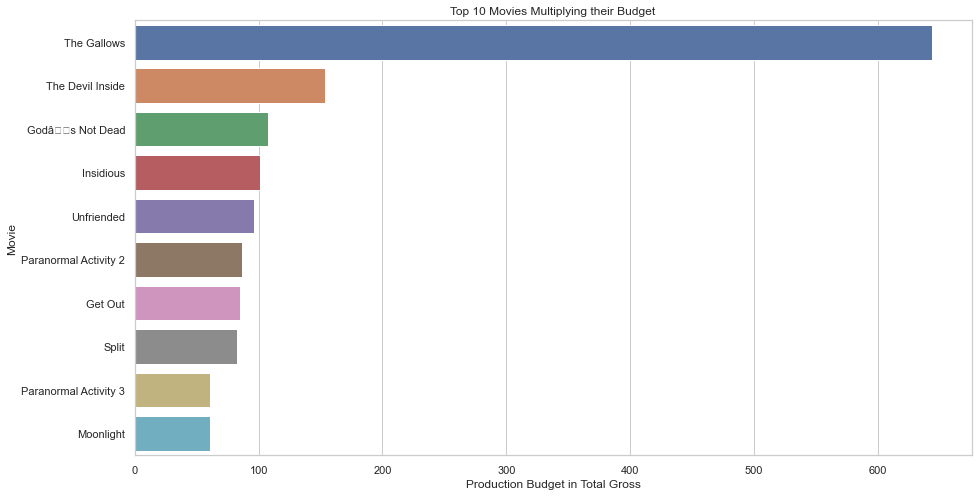

In [482]:
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'pb_in_gross', y = 'movie', data = tnpbig_df)
plt.xlabel('Production Budget in Total Gross')
plt.ylabel('Movie')
plt.title('Top 10 Movies Multiplying their Budget'); #Making a bar graph of this information

Before we take a summary of question 3's data, let's recreate some of the graphs so you can see both the production budget and how much each movie grossed.

In [483]:
tndate_df.head(2) #Reviewing the dataframe again

,movie,production_budget,domestic_gross,worldwide_gross,year,total_gross,gross-budget,pb_in_gross
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,1.286728e+09,876127750.0,2.133774
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,1.925247e+08,-157475300.0,-0.449929


In [484]:
tndate_df['production_budget'] = tndate_df['production_budget'] / 1000000
tndate_df['domestic_gross'] = tndate_df['domestic_gross'] / 1000000
tndate_df['worldwide_gross'] = tndate_df['worldwide_gross'] / 1000000
tndate_df['total_gross'] = tndate_df['total_gross'] / 1000000
tndate_df['gross-budget'] = tndate_df['gross-budget'] / 1000000 #Scaling down these columns for graphing

<ipython-input-484-7ff48712830f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tndate_df['production_budget'] = tndate_df['production_budget'] / 1000000
<ipython-input-484-7ff48712830f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tndate_df['domestic_gross'] = tndate_df['domestic_gross'] / 1000000
<ipython-input-484-7ff48712830f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [485]:
tndate_df.head(2) #Checking to see if the values were scaled

,movie,production_budget,domestic_gross,worldwide_gross,year,total_gross,gross-budget,pb_in_gross
1,Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,2011,1286.72775,876.12775,2.133774
2,Dark Phoenix,350.0,42.762350,149.762350,2019,192.52470,-157.47530,-0.449929


In order to properly graph this data, we need to fix the dataframe so that it properly displays the information.

In [489]:
tnpbfin_df = tndate_df[['movie', 'production_budget', 'domestic_gross', 'worldwide_gross']].copy()
tnpbfin_df #Making a new dataframe with only the columns needed

,movie,production_budget,domestic_gross,worldwide_gross
1,Pirates of the Caribbean: On Stranger Tides,410.6000,241.063875,1045.663875
2,Dark Phoenix,350.0000,42.762350,149.762350
3,Avengers: Age of Ultron,330.6000,459.005868,1403.013963
4,Star Wars Ep. VIII: The Last Jedi,317.0000,620.181382,1316.721747
5,Star Wars Ep. VII: The Force Awakens,306.0000,936.662225,2053.311220
...,...,...,...,...
5761,Stories of Our Lives,0.0150,0.000000,0.000000
5771,Family Motocross,0.0100,0.000000,0.000000
5772,Newlyweds,0.0090,0.004584,0.004584
5777,Red 11,0.0070,0.000000,0.000000


In [498]:
tnpbfin_df = tnpbfin_df.sort_values(by = ['production_budget'], ascending = False)
tnpbfin_df #Organizing dataframe by production budget

,movie,production_budget,domestic_gross,worldwide_gross
1,Pirates of the Caribbean: On Stranger Tides,410.6000,241.063875,1045.663875
2,Dark Phoenix,350.0000,42.762350,149.762350
3,Avengers: Age of Ultron,330.6000,459.005868,1403.013963
4,Star Wars Ep. VIII: The Last Jedi,317.0000,620.181382,1316.721747
5,Star Wars Ep. VII: The Force Awakens,306.0000,936.662225,2053.311220
...,...,...,...,...
5761,Stories of Our Lives,0.0150,0.000000,0.000000
5771,Family Motocross,0.0100,0.000000,0.000000
5772,Newlyweds,0.0090,0.004584,0.004584
5777,Red 11,0.0070,0.000000,0.000000


In [499]:
tnpbfin_df = tnpbfin_df.head(10) #Showing only the top 10 production budgets
tnpbfin_df

,movie,production_budget,domestic_gross,worldwide_gross
1,Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875
2,Dark Phoenix,350.0,42.762350,149.762350
3,Avengers: Age of Ultron,330.6,459.005868,1403.013963
4,Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747
5,Star Wars Ep. VII: The Force Awakens,306.0,936.662225,2053.311220
6,Avengers: Infinity War,300.0,678.815482,2048.134200
8,Justice League,300.0,229.024295,655.945209
9,Spectre,300.0,200.074175,879.620923
12,The Lone Ranger,275.0,89.302115,260.002115
13,John Carter,275.0,73.058679,282.778100


In [500]:
tnmeltpbfin_df = pd.melt(tnpbfin_df, id_vars = 'movie', var_name = 'budget', value_name = 'money')
tnmeltpbfin_df #Melting this dataframe into an easily graphable dataframe

,movie,budget,money
0,Pirates of the Caribbean: On Stranger Tides,production_budget,410.600000
1,Dark Phoenix,production_budget,350.000000
2,Avengers: Age of Ultron,production_budget,330.600000
3,Star Wars Ep. VIII: The Last Jedi,production_budget,317.000000
4,Star Wars Ep. VII: The Force Awakens,production_budget,306.000000
5,Avengers: Infinity War,production_budget,300.000000
6,Justice League,production_budget,300.000000
7,Spectre,production_budget,300.000000
8,The Lone Ranger,production_budget,275.000000
9,John Carter,production_budget,275.000000


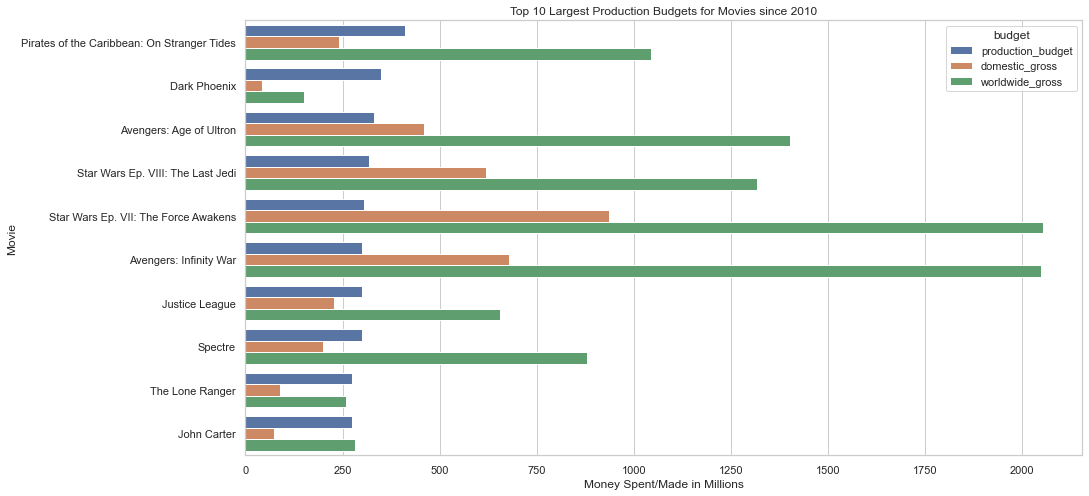

In [512]:
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'money', y = 'movie', hue = 'budget', data = tnmeltpbfin_df)
plt.xlabel('Money Spent/Made in Millions')
plt.ylabel('Movie')
plt.title('Top 10 Largest Production Budgets for Movies since 2010'); #Making a bar graph of this information

Now we can easily see the movies with the highest production budgets along with how much they made domestically and internationally. Let's keep going and fix up the rest of the graphs from question 3.

In [504]:
tntgfin_df = tndate_df[['movie', 'production_budget', 'total_gross']].copy()
tntgfin_df #Making a new dataframe with only the columns needed

,movie,production_budget,total_gross
1,Pirates of the Caribbean: On Stranger Tides,410.6000,1286.727750
2,Dark Phoenix,350.0000,192.524700
3,Avengers: Age of Ultron,330.6000,1862.019831
4,Star Wars Ep. VIII: The Last Jedi,317.0000,1936.903129
5,Star Wars Ep. VII: The Force Awakens,306.0000,2989.973445
...,...,...,...
5761,Stories of Our Lives,0.0150,0.000000
5771,Family Motocross,0.0100,0.000000
5772,Newlyweds,0.0090,0.009168
5777,Red 11,0.0070,0.000000


In [505]:
tntgfin_df = tntgfin_df.sort_values(by = ['total_gross'], ascending = False)
tntgfin_df #Organizing dataframe by total gross

,movie,production_budget,total_gross
5,Star Wars Ep. VII: The Force Awakens,306.0000,2989.973445
6,Avengers: Infinity War,300.0000,2726.949682
33,Jurassic World,215.0000,2301.125489
26,The Avengers,225.0000,2141.215444
41,Black Panther,200.0000,2048.317790
...,...,...,...
5313,Hidden Away,1.0000,0.000000
5312,Black Rock,1.0000,0.000000
5311,Truth or Die,1.0000,0.000000
5310,Snow White: A Deadly Summer,1.0000,0.000000


In [506]:
tntgfin_df = tntgfin_df.head(10) #Showing only the top 10 grossing movies
tntgfin_df

,movie,production_budget,total_gross
5,Star Wars Ep. VII: The Force Awakens,306.0,2989.973445
6,Avengers: Infinity War,300.0,2726.949682
33,Jurassic World,215.0,2301.125489
26,The Avengers,225.0,2141.215444
41,Black Panther,200.0,2048.317790
4,Star Wars Ep. VIII: The Last Jedi,317.0,1936.903129
66,Furious 7,190.0,1871.729814
3,Avengers: Age of Ultron,330.6,1862.019831
43,Incredibles 2,200.0,1851.102455
134,Beauty and the Beast,160.0,1763.213871


In [507]:
tntgmeltfin_df = pd.melt(tntgfin_df, id_vars = 'movie', var_name = 'budget', value_name = 'money')
tntgmeltfin_df #Melting this dataframe into an easily graphable dataframe

,movie,budget,money
0,Star Wars Ep. VII: The Force Awakens,production_budget,306.000000
1,Avengers: Infinity War,production_budget,300.000000
2,Jurassic World,production_budget,215.000000
3,The Avengers,production_budget,225.000000
4,Black Panther,production_budget,200.000000
5,Star Wars Ep. VIII: The Last Jedi,production_budget,317.000000
6,Furious 7,production_budget,190.000000
7,Avengers: Age of Ultron,production_budget,330.600000
8,Incredibles 2,production_budget,200.000000
9,Beauty and the Beast,production_budget,160.000000


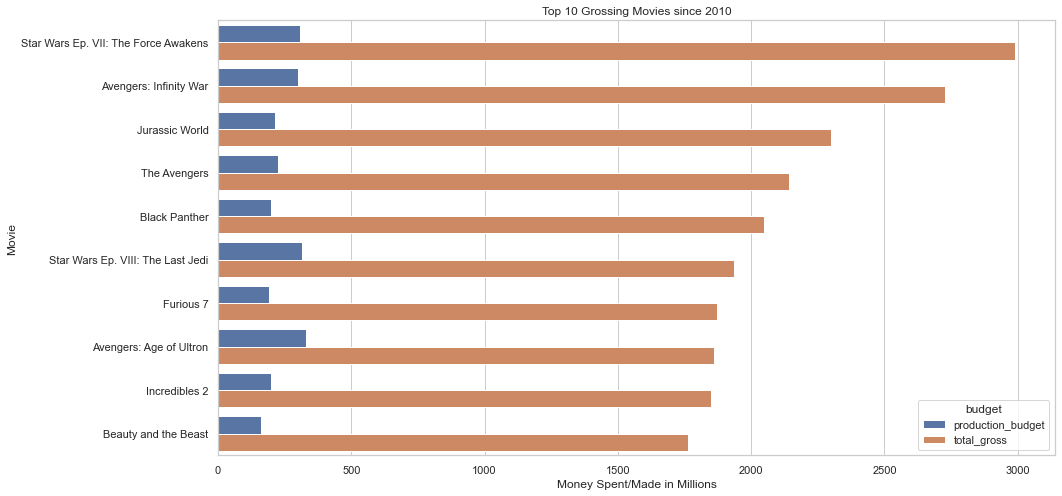

In [511]:
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'money', y = 'movie', hue = 'budget', data = tntgmeltfin_df)
plt.xlabel('Money Spent/Made in Millions')
plt.ylabel('Movie')
plt.title('Top 10 Grossing Movies since 2010'); #Making a bar graph of this information

### Question 3 Summary:
* The movies with the largest production budgets were *Pirates of the Caribbean: On Stranger Tides*, *Dark Phoenix*, *Avengers: Age of Ultron*, *Star Wars Ep. VIII: The Last Jedi*, and *Star Wars Ep. VII: The Force Awakens*; their budgets were around \$300 million or more.
* The movies that made the most money were *Star Wars Ep. VII: The Force Awakens*, *Avengers: Infinity War*, *Jurassic World*, *The Avengers*, and *Black Panther*; each making upwards of \$2 billion.
* The movies that made the most over their budget were *Star Wars Ep. VII: The Force Awakens*, *Avengers: Infinity War*, *Jurassic World*, *The Avengers*, and *Black Panther*; each making around \$1.5 billion or more over their production budget.
* The movies that grossed their production budget the most were *The Gallows*, *The Devil Inside*, *God's Not Dead*, *Insidious*, and *Unfriended*; each making anywhere from 100 times their production budget to 600 times their production budget.

## Conclusion
Within this notebook, sets of movie data were cleaned, organized, and analyzed in order to give recommendations to Microsoft to create original content for their new streaming platform.

It was determined that:
* The best studios to work with to make the most money are, in no particular order: Buena Vista, Fox, Sony, Universal, and Warner Brothers.
* The highest rated movie genres are, in no particular order: Action, Comedy, Documentary, Family, and Musical.
* In order to make the most money, the production budget of a movie should be \$ 250 million or higher.